In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import shap

# sklearn imports
from sklearn import datasets
from sklearn import svm
from sklearn.base import ClassifierMixin, RegressorMixin
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import mean_absolute_error, root_mean_squared_error, r2_score, classification_report, accuracy_score, precision_score, recall_score, f1_score, auc
from sklearn.model_selection import train_test_split

# ml_dashboard_backend imports 
from ml_dashboard_backend.modeling import train_and_evaluate_estimator, create_parity_plot, create_residual_plot, generate_learning_curve_data, create_learning_curve_plot

# ---OLD WAY---

# Example: Iris Classification Dataset

## Load Dataset

In [2]:
iris = datasets.load_iris()

In [3]:
inputs = iris.feature_names
outputs = ["Iris Class"]

In [4]:
iris_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)

### CHECK:
iris_features.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [5]:
iris_targets = pd.DataFrame(data=iris.target, columns=outputs)

### CHECK:
iris_targets.columns

Index(['Iris Class'], dtype='object')

In [6]:
iris_dataset = pd.concat(objs=[iris_features, iris_targets], axis=1)

### CHECK:
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## Train a Model

In [7]:
# iris_features, iris_targets = datasets.load_iris(return_X_y=True, as_frame=True)

In [8]:
# iris_dataset = pd.concat(objs=[iris_features, iris_targets], axis=1)

# ### CHECK:
# iris_dataset

In [9]:
X = iris_features
y_all = iris_targets

In [10]:
if isinstance(y_all, pd.Series):
    y_all = pd.DataFrame(y_all)

In [11]:
estimators_by_output = dict()

for target in y_all.columns:
    y = y_all[target]

    # splitting dataset into Training (80%) and testing data (20%) using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # RF classifier with default hyperparameters
    estimator = RandomForestClassifier()
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    estimators_by_output[target] = estimator
    
    # classification accuracy
    print(target)
    print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
    print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
    print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
    print(f"F1: {f1_score(y_test, y_pred, average='macro')}")
    print(classification_report(y_pred, y_test))


Iris Class
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
# splitting dataset into Training (80%) and testing data (20%) using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
# RF classifier with default hyperparameters
estimator = RandomForestClassifier()
estimator.fit(X_train, y_train)
y_pred = estimator.predict(X_test)

In [14]:
# classification accuracy
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(f"F1: {f1_score(y_test, y_pred, average='macro')}")
print(classification_report(y_pred, y_test))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



### Save dataset

In [289]:
filename = "iris_dataset.pkl"
dataset_to_save = iris_dataset

In [290]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "datasets", filename)
with open(filepath, "wb") as handle:
    pickle.dump(dataset_to_save, handle)

### Load dataset

In [291]:
with open(filepath, "rb") as f:
    dataset = pickle.load(f)

In [292]:
dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### Save model

In [293]:
inputs

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [294]:
outputs

['Iris Class']

In [295]:
filename = "iris_RF.pkl"
model_to_save = estimator

In [296]:
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [297]:
estimator_type = str(type(estimator)).split("<class '")[-1].split("'>")[0]
estimator_type = f"{estimator_type.split('.')[0]} {estimator_type.split('.')[-1]}"
estimator_type

'sklearn RandomForestClassifier'

In [298]:
model_and_metadata = {
    "training_data": "linnerud_dataset",
    "estimators_by_output": {
        output: {
            "estimator": estimators_by_output[output], 
            "model_type": estimator_type,
            "inputs_reals": inputs,
        } for output in estimators_by_output.keys()
    }
}

In [299]:
model_and_metadata

{'training_data': 'linnerud_dataset',
 'estimators_by_output': {'Iris Class': {'estimator': RandomForestClassifier(),
   'model_type': 'sklearn RandomForestClassifier',
   'inputs_reals': ['sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)']}}}

In [300]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "models", filename)
with open(filepath, "wb") as handle:
    pickle.dump(model_and_metadata, handle)

### Load model

In [401]:
filepath = '/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/models/iris_RF.pkl'

In [402]:
filepath

'/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/models/iris_RF.pkl'

In [403]:
with open(filepath, "rb") as f:
    model_and_metadata = pickle.load(f)

In [416]:
estimators_by_output = model_and_metadata["estimators_by_output"]
estimators_by_output

{'Iris Class': {'estimator': RandomForestClassifier(),
  'model_type': 'sklearn RandomForestClassifier',
  'inputs_reals': ['sepal length (cm)',
   'sepal width (cm)',
   'petal length (cm)',
   'petal width (cm)']}}

In [417]:
estimator = estimators_by_output["Iris Class"]["estimator"]
estimator

RandomForestClassifier()

In [418]:
estimators_by_output["Iris Class"]["model_type"]

'sklearn RandomForestClassifier'

In [422]:
inputs = estimators_by_output["Iris Class"]["inputs_reals"]
inputs

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [420]:
outputs = list(model_and_metadata["estimators_by_output"].keys())
outputs

['Iris Class']

In [421]:
estimator.feature_importances_

array([0.08995242, 0.02695579, 0.45537527, 0.42771653])

## SHAP Analysis

In [323]:
# explainer = shap.Explainer(estimator, output_names=outputs, feature_names=inputs)
# shap_values = explainer.shap_values(X_test)

In [463]:
explainer = shap.Explainer(estimator)
shap_values = explainer.shap_values(iris_dataset[inputs])
# shap_values = explainer(iris_dataset[inputs])

In [464]:
shap_values

[array([[ 5.93743397e-02,  9.78743219e-04,  3.34103698e-01,
          2.70793220e-01],
        [ 5.87156095e-02, -5.60939321e-04,  3.34103698e-01,
          2.72991632e-01],
        [ 5.93743397e-02,  9.78743219e-04,  3.34103698e-01,
          2.70793220e-01],
        [ 5.87156095e-02, -5.60939321e-04,  3.34103698e-01,
          2.72991632e-01],
        [ 5.65410064e-02,  3.31207655e-03,  3.34103698e-01,
          2.71293220e-01],
        [ 4.64576730e-02,  1.11037432e-02,  3.35937031e-01,
          2.71751553e-01],
        [ 5.93743397e-02,  9.78743219e-04,  3.34103698e-01,
          2.70793220e-01],
        [ 5.93743397e-02,  9.78743219e-04,  3.34103698e-01,
          2.70793220e-01],
        [ 5.87156095e-02, -5.60939321e-04,  3.34103698e-01,
          2.72991632e-01],
        [ 5.87156095e-02, -5.60939321e-04,  3.34103698e-01,
          2.72991632e-01],
        [ 4.88882286e-02,  9.24263211e-03,  3.35367586e-01,
          2.71751553e-01],
        [ 5.93743397e-02,  9.78743219e-04, 

In [465]:
shap_values.values

AttributeError: 'list' object has no attribute 'values'

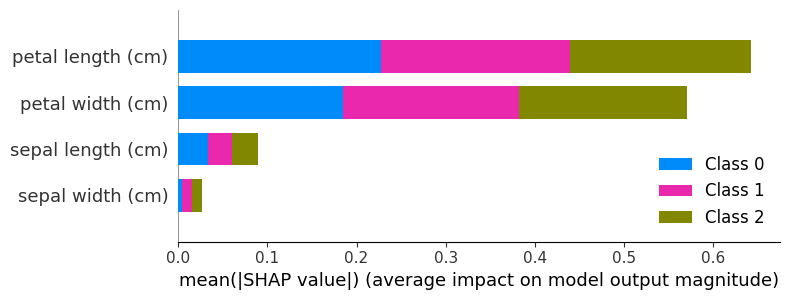

In [467]:
shap.summary_plot(shap_values, features=iris_dataset[inputs], feature_names=inputs)

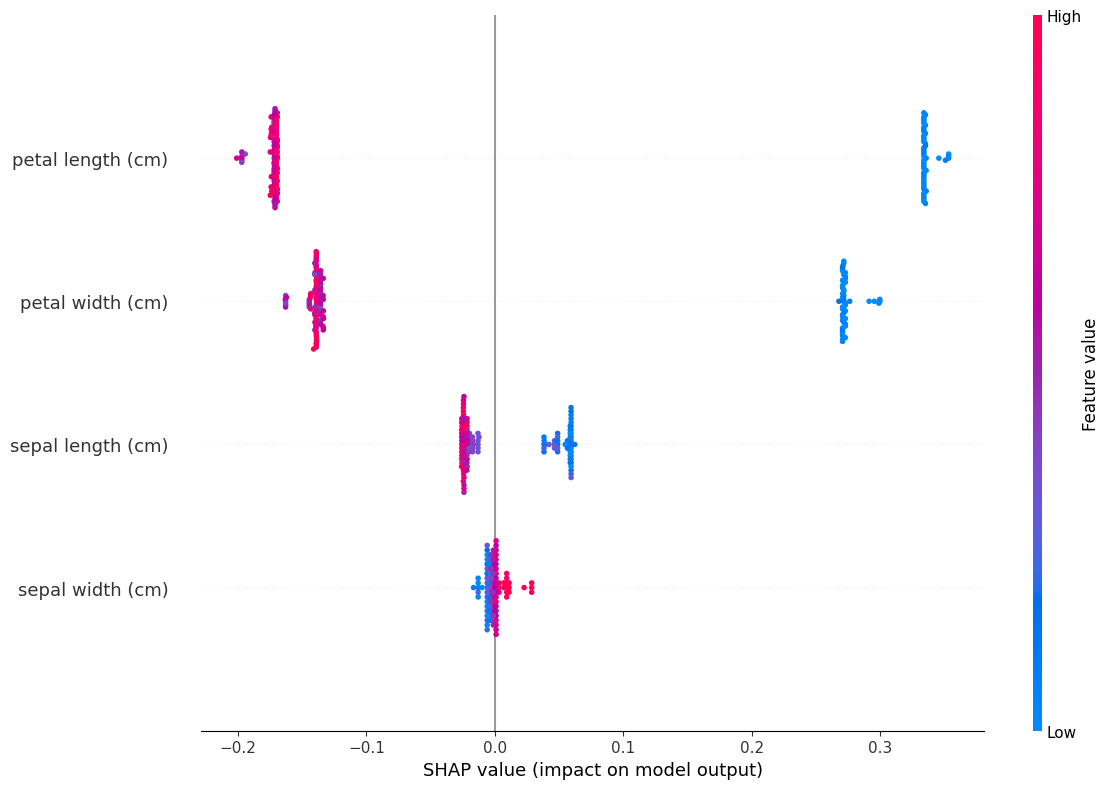

In [345]:
shap.summary_plot(shap_values[0], features=iris_dataset[inputs], feature_names=inputs, plot_size=(12,8))

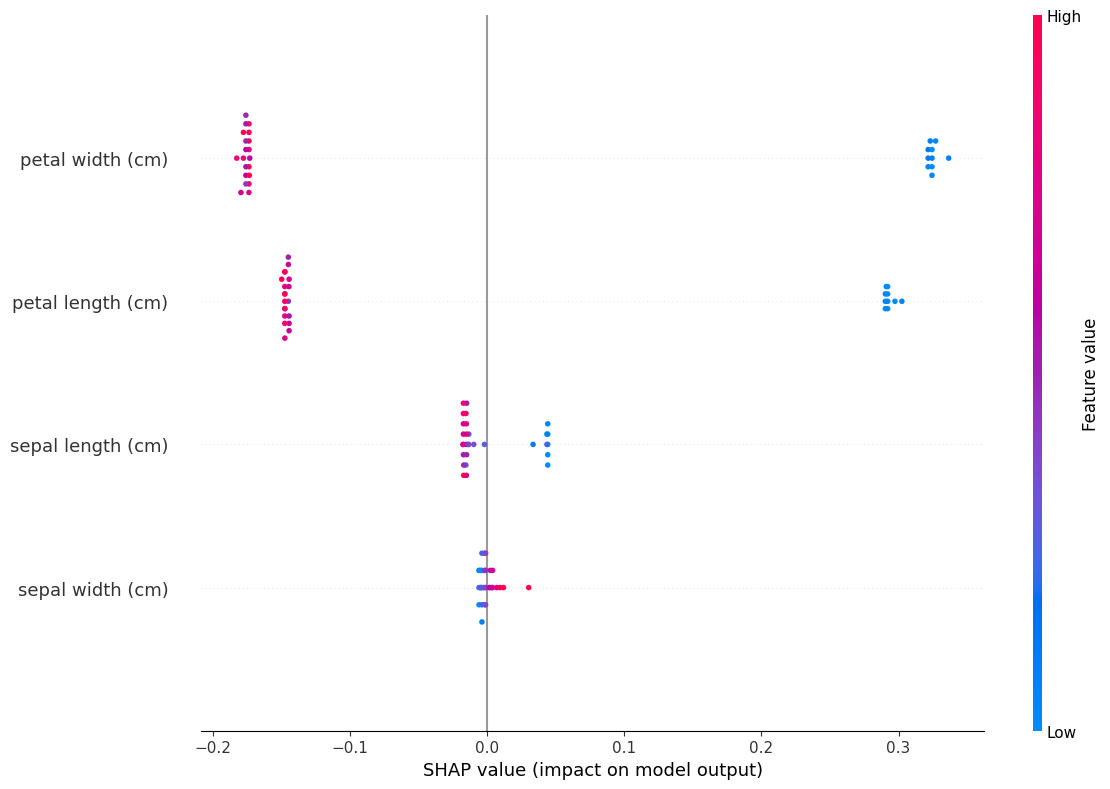

In [60]:
shap.summary_plot(shap_values[0], features=X_test, feature_names=inputs, plot_size=(12,8))

In [472]:
explainer = shap.Explainer(estimator)
shap_values = explainer(iris_dataset[inputs])

In [482]:
shap_values[0]

.values =
array([[ 0.05937434, -0.02659962, -0.03277472],
       [ 0.00097874,  0.00922562, -0.01020436],
       [ 0.3341037 , -0.18475724, -0.14934645],
       [ 0.27079322, -0.14520209, -0.12559113]])

.base_values =
array([0.33475   , 0.34733333, 0.31791667])

.data =
array([5.1, 3.5, 1.4, 0.2])

In [480]:
selected_sample = 0

shap.waterfall_plot(shap_values[0,0])

TypeError: only length-1 arrays can be converted to Python scalars

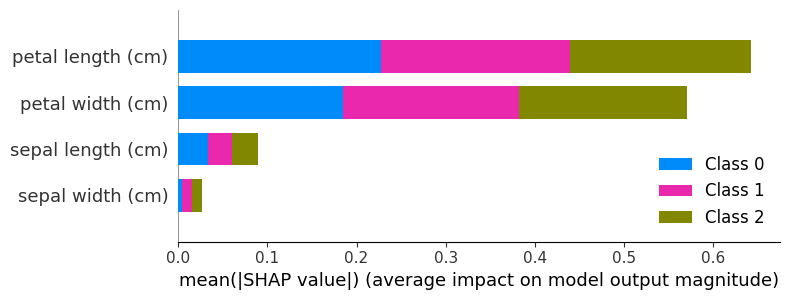

In [340]:
shap.summary_plot(shap_values, features=X_test, feature_names=inputs)

# Example: Telecom Customer Churn

## Load Dataset

In [257]:
customer = pd.read_csv("data/customer_churn.csv")

### CHECK:
customer.head()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,177.8760,69.7640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,41.4315,60.0000,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,1382.8680,203.6520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,216.0180,74.0020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,131.2245,64.5805,0


In [258]:
customer.describe()

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,FN,FP,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,423.875624,98.304688,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,465.313890,50.724492,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000,60.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,102.421125,61.380125,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,205.632000,72.848000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,709.549875,128.838875,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1948.752000,266.528000,1.000000


In [259]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  FN                       3150 non-null   float64
 14  FP                      

## Train a Model

In [260]:
X = customer.drop("Churn", axis=1) # Independent variables
y = customer.Churn # Dependent variable

# Split into train and test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Train a machine learning model
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)

# Make prediction on the testing data
y_pred = clf.predict(X_test)

# Classification Report
print(classification_report(y_pred, y_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       816
           1       0.79      0.82      0.80       129

    accuracy                           0.94       945
   macro avg       0.88      0.89      0.89       945
weighted avg       0.95      0.94      0.95       945



In [261]:
inputs = X.columns.tolist()
outputs = y.name

In [262]:
clf.feature_importances_

array([0.05855142, 0.16978623, 0.11749798, 0.01697686, 0.11501642,
       0.09575018, 0.04077633, 0.05324239, 0.02789279, 0.00105877,
       0.11657899, 0.02613689, 0.05118157, 0.06507648, 0.04447669])

## SHAP Analysis

In [263]:
explainer = shap.Explainer(clf)
shap_values = explainer.shap_values(X_test)

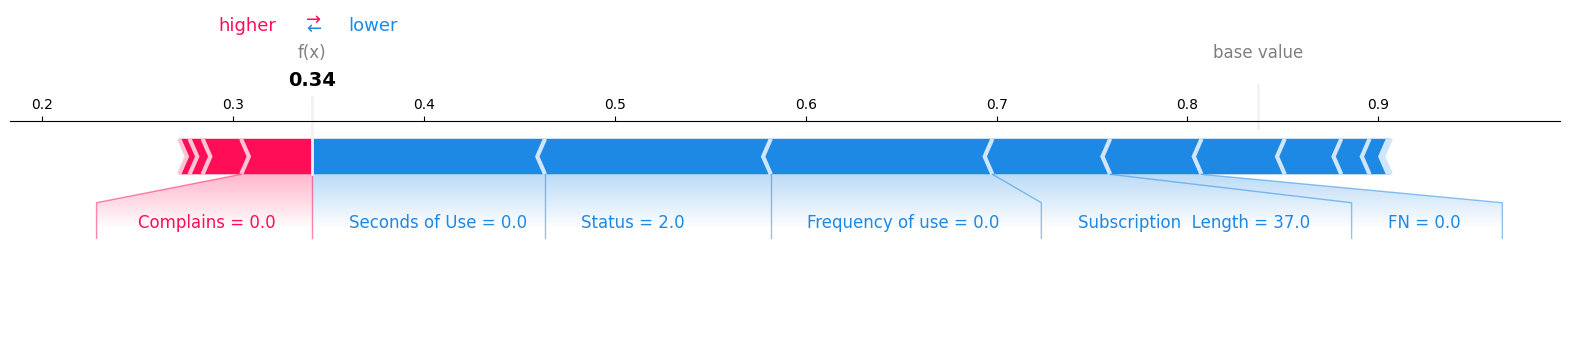

In [264]:
shap.plots.force(explainer.expected_value[0], shap_values[0][0,:], X_test.iloc[0, :], matplotlib = True)

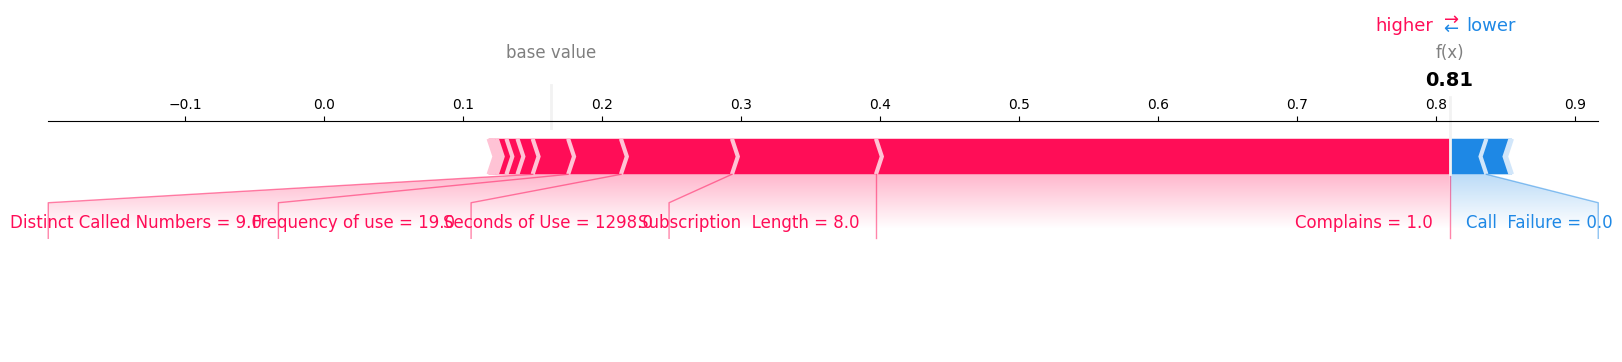

In [265]:
shap.plots.force(explainer.expected_value[1], shap_values[1][6, :], X_test.iloc[6, :],matplotlib = True)

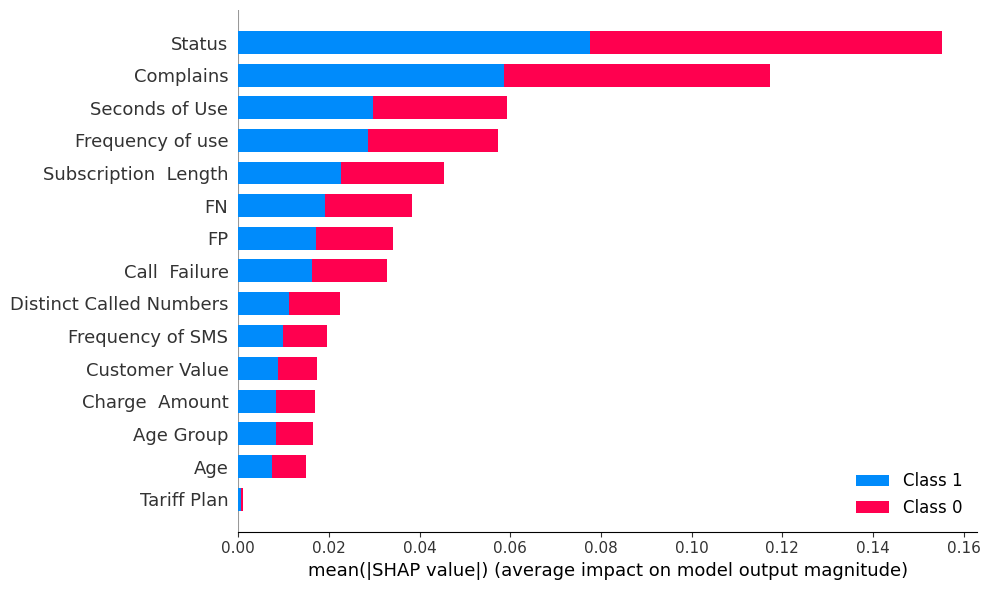

In [266]:
# shap.summary_plot(shap_values, X_test)
shap.summary_plot(shap_values, X_test, plot_size=(10,6))

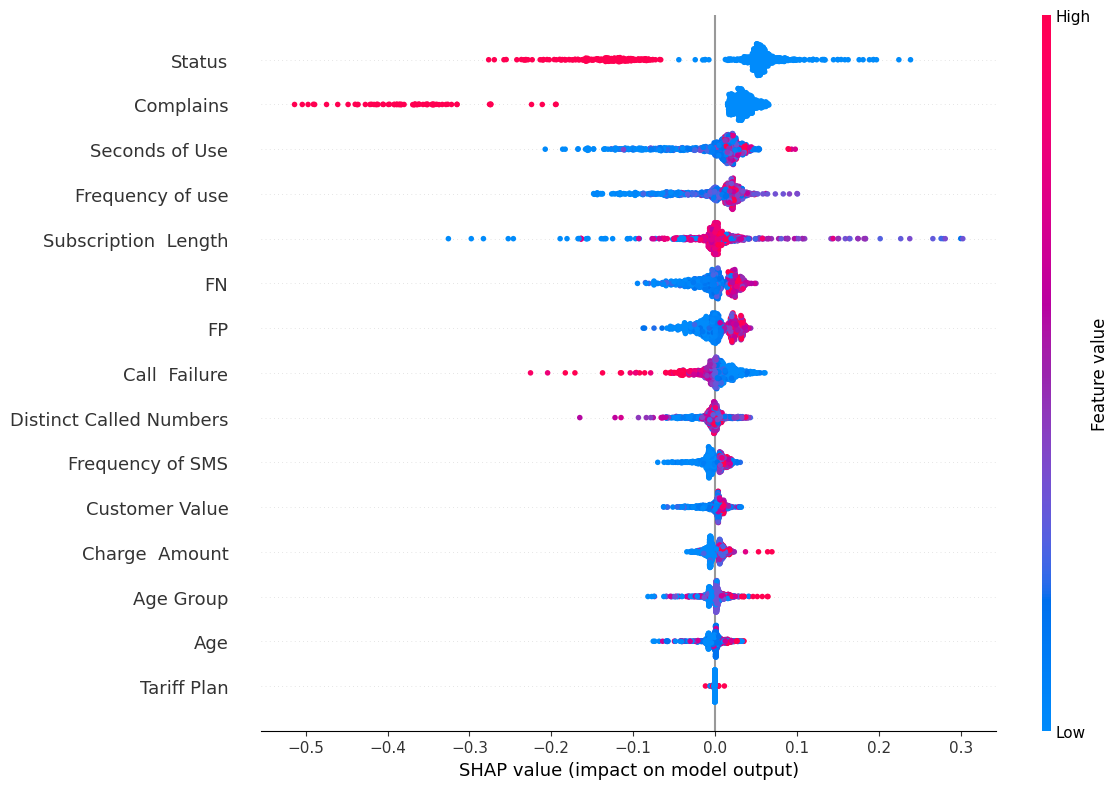

In [280]:
shap.summary_plot(shap_values[0], features=X_test, feature_names=inputs, plot_size=(12,8))

# Example: Linnerud Dataset

In [63]:
# Load the Linnerud dataset
linnerud_features, linnerud_targets = datasets.load_linnerud(return_X_y=True, as_frame=True)
linnerud_dataset = pd.concat(objs=[linnerud_features, linnerud_targets], axis=1)

### CHECK:
linnerud_dataset

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [64]:
linnerud_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Chins   20 non-null     float64
 1   Situps  20 non-null     float64
 2   Jumps   20 non-null     float64
 3   Weight  20 non-null     float64
 4   Waist   20 non-null     float64
 5   Pulse   20 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [65]:
inputs = linnerud_features.columns.tolist()

### CHECK:
inputs

['Chins', 'Situps', 'Jumps']

In [69]:
outputs = linnerud_targets.columns.tolist()

### CHECK:
outputs

['Weight', 'Waist', 'Pulse']

## Train a Model

In [236]:
X = linnerud_features
y_all = linnerud_targets

if isinstance(y_all, pd.Series):
    y_all = pd.DataFrame(y_all)

In [233]:
estimators_by_output = dict()

for target in y_all.columns:
    y = y_all[target]

    # splitting dataset into Training (80%) and testing data (20%) using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # RF classifier with default hyperparameters
    estimator = RandomForestRegressor()
    # estimator = GaussianProcessRegressor(alpha=1e-3)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    estimators_by_output[target] = estimator
    
    # classification accuracy
    print(target)
    print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"  RMSE: {root_mean_squared_error(y_test, y_pred)}")
    print(f"  R^2: {r2_score(y_test, y_pred)}")
    print()

2024/07/23 17:16:13 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '42ded4d19d574c5fba1915a754f414ba', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Weight
  MAE: 20.98250000000001
  RMSE: 24.044507168998084
  R^2: -1.0560598355190054



2024/07/23 17:16:17 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '5f7af83234a84a73906cd5c8d55f8eb6', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Waist
  MAE: 2.272500000000001
  RMSE: 2.4200878083243182
  R^2: -0.37807647058823557



2024/07/23 17:16:21 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '388c060ddb53409fbfefb1a5df322f69', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

Pulse
  MAE: 5.405000000000001
  RMSE: 5.491857609224771
  R^2: -0.37093181818181886



In [135]:
estimators_by_output

{'Weight': RandomForestRegressor(),
 'Waist': RandomForestRegressor(),
 'Pulse': RandomForestRegressor()}

In [130]:
y_pred[:,1]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [83]:
y_test.to_numpy()

array([[191.,  36.,  50.],
       [157.,  32.,  52.],
       [202.,  37.,  62.],
       [189.,  37.,  52.]])

In [88]:
target_num = 1

# classification accuracy
print(f"MAE: {mean_absolute_error(y_test.to_numpy()[:,target_num], y_pred[:,target_num])}")
print(f"RMSE: {root_mean_squared_error(y_test.to_numpy()[:,target_num], y_pred[:,target_num])}")
print(f"R^2: {r2_score(y_test.to_numpy()[:,target_num], y_pred[:,target_num])}")

MAE: 2.224999999999998
RMSE: 2.359925846292631
R^2: -0.3104117647058806


### Save dataset

In [89]:
filename = "linnerud_dataset.pkl"
dataset_to_save = linnerud_dataset

In [90]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "datasets", filename)
with open(filepath, "wb") as handle:
    pickle.dump(dataset_to_save, handle)

### Load dataset

In [91]:
filepath

'/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/datasets/linnerud_dataset.pkl'

In [92]:
with open(filepath, "rb") as f:
    dataset = pickle.load(f)

In [93]:
dataset

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


### Save model

In [94]:
inputs

['Chins', 'Situps', 'Jumps']

In [95]:
outputs

['Weight', 'Waist', 'Pulse']

In [96]:
filename = "linnerud_RF.pkl"
model_to_save = estimator

In [140]:
estimator_type = str(type(estimator)).split("<class '")[-1].split("'>")[0]
estimator_type = f"{estimator_type.split('.')[0]} {estimator_type.split('.')[-1]}"
estimator_type

'sklearn RandomForestRegressor'

In [153]:
model_and_metadata = {
    "training_data": "linnerud_dataset",
    "estimators_by_output": {
        output: {
            "estimator": estimators_by_output[output], 
            "model_type": estimator_type,
            "inputs_reals": inputs,
        } for output in estimators_by_output.keys()
    }
}

In [194]:
model_and_metadata

{'training_data': 'linnerud_dataset',
 'estimators_by_output': {'Weight': {'estimator': RandomForestRegressor(),
   'model_type': 'sklearn RandomForestRegressor',
   'inputs_reals': ['Chins', 'Situps', 'Jumps']},
  'Waist': {'estimator': RandomForestRegressor(),
   'model_type': 'sklearn RandomForestRegressor',
   'inputs_reals': ['Chins', 'Situps', 'Jumps']},
  'Pulse': {'estimator': RandomForestRegressor(),
   'model_type': 'sklearn RandomForestRegressor',
   'inputs_reals': ['Chins', 'Situps', 'Jumps']}}}

In [169]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "models", filename)
with open(filepath, "wb") as handle:
    pickle.dump(model_and_metadata, handle)

### Load model

In [170]:
filepath

'/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/models/linnerud_RF.pkl'

In [171]:
with open(filepath, "rb") as f:
    model_and_metadata = pickle.load(f)

In [172]:
model = model_and_metadata["estimators_by_output"][target]["estimator"]
model

RandomForestRegressor()

In [173]:
model_and_metadata["estimators_by_output"][target]["inputs_reals"]

['Chins', 'Situps', 'Jumps']

In [179]:
list(model_and_metadata["estimators_by_output"].keys())

['Weight', 'Waist', 'Pulse']

In [175]:
model.feature_importances_

array([0.31891337, 0.60296863, 0.078118  ])

In [176]:
model.n_outputs_

1

## SHAP Analysis

In [177]:
explainer = shap.Explainer(model, output_names=target, feature_names=inputs)
# explainer = shap.KernelExplainer(model.predict, dataset[inputs], feature_names=inputs)
shap_values = explainer.shap_values(X_test)

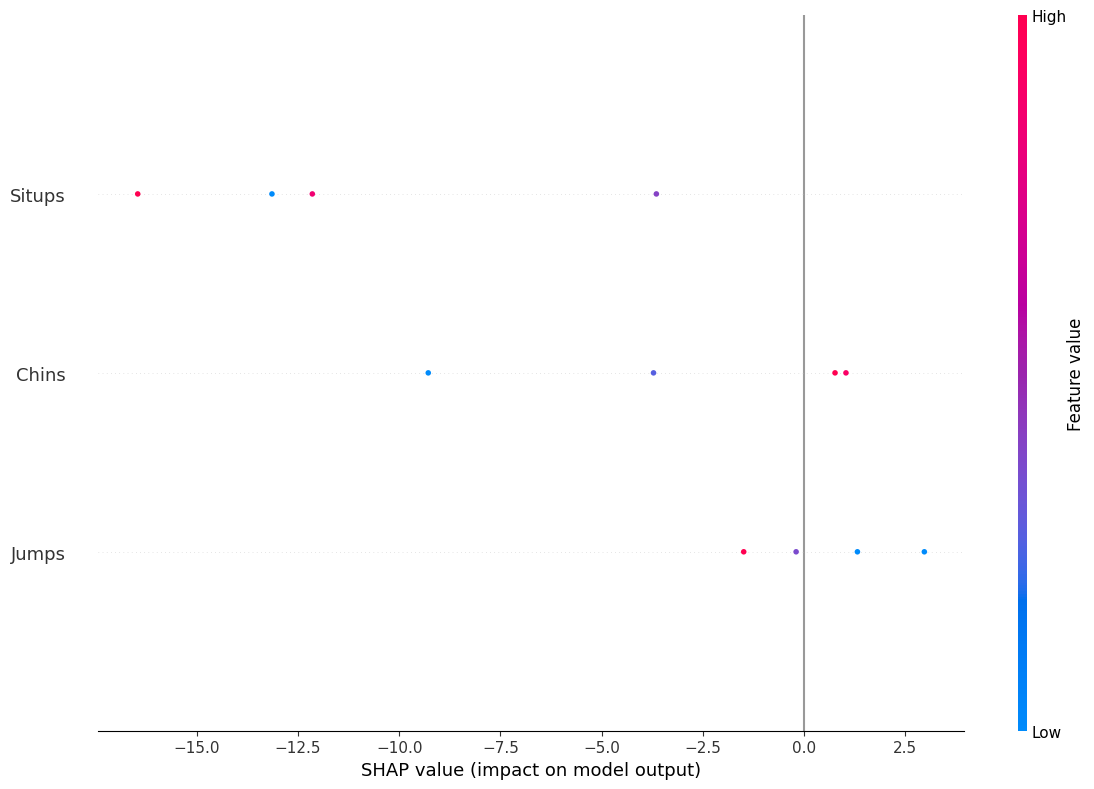

In [178]:
shap.summary_plot(shap_values, features=X_test, feature_names=inputs, plot_size=(12,8))

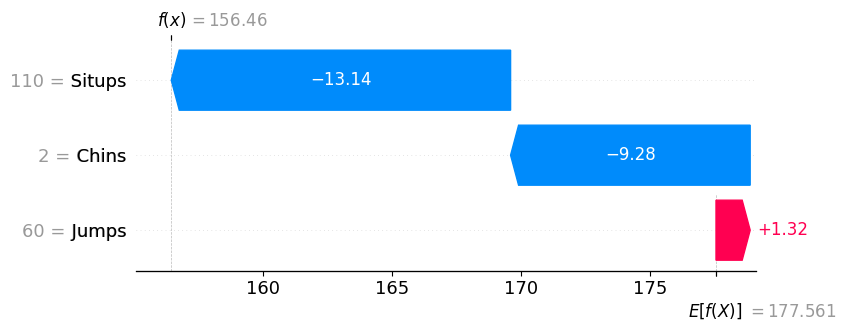

In [190]:
plt.figure(figsize=(10, 20))

shap_values = explainer(dataset[inputs])
shap.waterfall_plot(shap_values[1])

plt.show()

In [196]:
model_and_metadata["estimators_by_output"]["Weight"]["inputs_reals"]

['Chins', 'Situps', 'Jumps']

In [206]:
inputs = set()
for output in outputs:
    inputs = inputs.union(set(model_and_metadata["estimators_by_output"][output]["inputs_reals"]))

In [208]:
inputs = {set(model_and_metadata["estimators_by_output"][output]["inputs_reals"]) for output in outputs}

TypeError: unhashable type: 'set'

In [209]:
inputs

{'Chins', 'Jumps', 'Situps'}

In [211]:
set(outputs) + inputs

TypeError: unsupported operand type(s) for +: 'set' and 'set'

# Example: Diabetes Dataset (Regression)

## Load Dataset

In [354]:
diabetes_features, diabetes_targets = datasets.load_diabetes(return_X_y=True, as_frame=True)

In [355]:
diabetes_dataset = pd.concat(objs=[diabetes_features, diabetes_targets], axis=1)

### CHECK:
diabetes_dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [356]:
diabetes_dataset.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-2.511817e-19,1.230790e-17,-2.245564e-16,-4.797570e-17,-1.381499e-17,3.918434e-17,-5.777179e-18,-9.042540e-18,9.293722e-17,1.130318e-17,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


In [357]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [358]:
print(datasets.load_diabetes().DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

:Number of Instances: 442

:Number of Attributes: First 10 columns are numeric predictive values

:Target: Column 11 is a quantitative measure of disease progression one year after baseline

:Attribute Information:
    - age     age in years
    - sex
    - bmi     body mass index
    - bp      average blood pressure
    - s1      tc, total serum cholesterol
    - s2      ldl, low-density lipoproteins
    - s3      hdl, high-density lipoproteins
    - s4      tch, total cholesterol / HDL
    - s5      ltg, possibly log of serum triglycerides level
    - s6      glu, blood sugar level

Note: Each of these 10 feature variables have bee

In [359]:
inputs = diabetes_features.columns.tolist()

### CHECK:
inputs

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [360]:
outputs = [diabetes_targets.name]

### CHECK:
outputs

['target']

## Train a Model

In [361]:
X = diabetes_features
y_all = diabetes_targets

if isinstance(y_all, pd.Series):
    y_all = pd.DataFrame(y_all)

In [362]:
estimators_by_output = dict()

for target in y_all.columns:
    y = y_all[target]

    # splitting dataset into Training (80%) and testing data (20%) using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # RF classifier with default hyperparameters
    estimator = RandomForestRegressor()
    # estimator = GaussianProcessRegressor(alpha=1e-3)
    estimator.fit(X_train, y_train)
    y_pred = estimator.predict(X_test)

    estimators_by_output[target] = estimator
    
    # classification accuracy
    print(target)
    print(f"  MAE: {mean_absolute_error(y_test, y_pred)}")
    print(f"  RMSE: {root_mean_squared_error(y_test, y_pred)}")
    print(f"  R^2: {r2_score(y_test, y_pred)}")
    print()

2024/07/24 14:23:06 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '980379c48af24c1f970a67e13b07d89e', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current sklearn workflow


Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

target
  MAE: 44.77696629213483
  RMSE: 54.880537093630856
  R^2: 0.43152376627780253



### Save dataset

In [363]:
filename = "diabetes_dataset.pkl"
dataset_to_save = diabetes_dataset

In [364]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "datasets", filename)
with open(filepath, "wb") as handle:
    pickle.dump(dataset_to_save, handle)

### Load dataset

In [365]:
filepath

'/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/datasets/diabetes_dataset.pkl'

In [366]:
with open(filepath, "rb") as f:
    dataset = pickle.load(f)

In [367]:
dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


### Save model

In [368]:
inputs

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [369]:
outputs

['target']

In [370]:
filename = "diabetes_RF.pkl"
model_to_save = estimator

In [371]:
estimator_type = str(type(estimator)).split("<class '")[-1].split("'>")[0]
estimator_type = f"{estimator_type.split('.')[0]} {estimator_type.split('.')[-1]}"
estimator_type

'sklearn RandomForestRegressor'

In [372]:
model_and_metadata = {
    "training_data": "linnerud_dataset",
    "estimators_by_output": {
        output: {
            "estimator": estimators_by_output[output], 
            "model_type": estimator_type,
            "inputs_reals": inputs,
        } for output in estimators_by_output.keys()
    }
}

In [373]:
model_and_metadata

{'training_data': 'linnerud_dataset',
 'estimators_by_output': {'target': {'estimator': RandomForestRegressor(),
   'model_type': 'sklearn RandomForestRegressor',
   'inputs_reals': ['age',
    'sex',
    'bmi',
    'bp',
    's1',
    's2',
    's3',
    's4',
    's5',
    's6']}}}

In [374]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "models", filename)
with open(filepath, "wb") as handle:
    pickle.dump(model_and_metadata, handle)

### Load model

In [375]:
filepath

'/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/models/diabetes_RF.pkl'

In [376]:
with open(filepath, "rb") as f:
    model_and_metadata = pickle.load(f)

In [378]:
estimators_by_output = model_and_metadata["estimators_by_output"]
estimators_by_output

{'target': {'estimator': RandomForestRegressor(),
  'model_type': 'sklearn RandomForestRegressor',
  'inputs_reals': ['age',
   'sex',
   'bmi',
   'bp',
   's1',
   's2',
   's3',
   's4',
   's5',
   's6']}}

In [379]:
estimators_by_output["target"]["inputs_reals"]

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [381]:
list(model_and_metadata["estimators_by_output"].keys())

['target']

In [385]:
estimator = estimators_by_output["target"]["estimator"]
estimator.feature_importances_

array([0.05554766, 0.01020742, 0.35825251, 0.09591243, 0.04880517,
       0.05530988, 0.05511366, 0.0248433 , 0.23282294, 0.06318503])

## SHAP Analysis

In [386]:
estimator

RandomForestRegressor()

In [395]:
explainer = shap.Explainer(estimator, output_names=outputs, feature_names=inputs)
# explainer = shap.Explainer(model, output_names=outputs, feature_names=inputs)

# explainer = shap.KernelExplainer(model.predict, dataset[inputs], feature_names=inputs)

shap_values = explainer(diabetes_dataset[inputs])

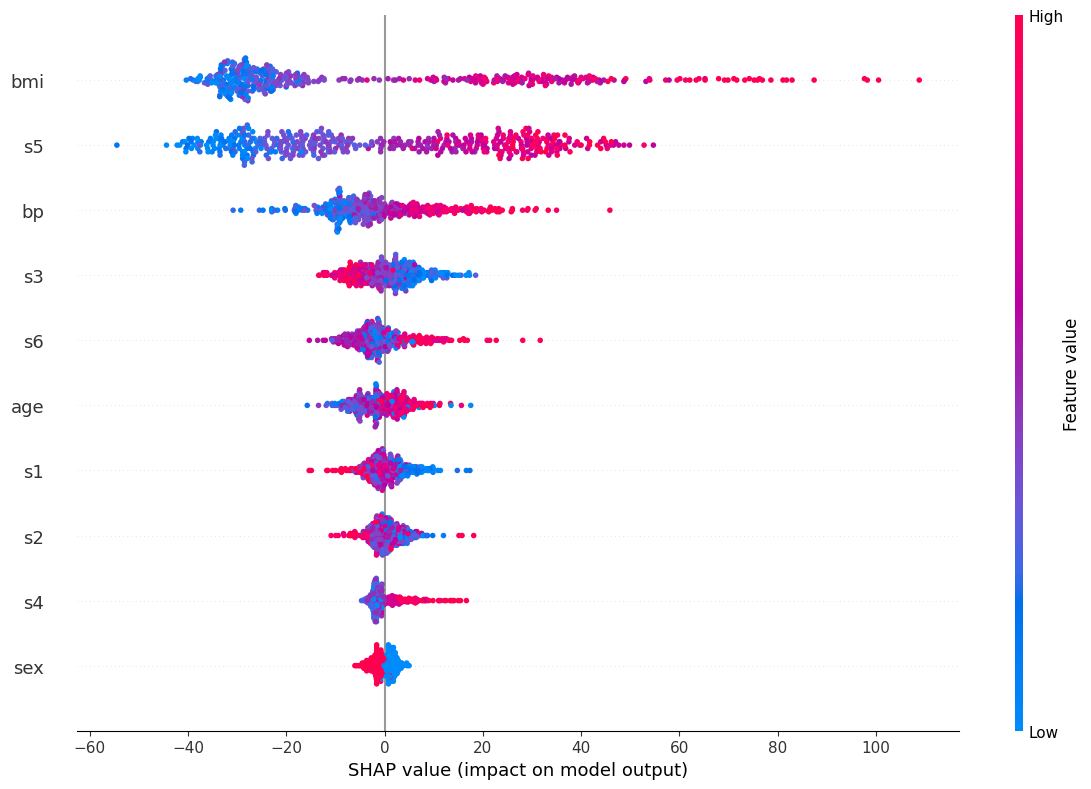

In [396]:
shap.summary_plot(shap_values, features=diabetes_dataset[inputs], feature_names=inputs, plot_size=(12,8))

In [399]:
type(shap_values)

shap._explanation.Explanation

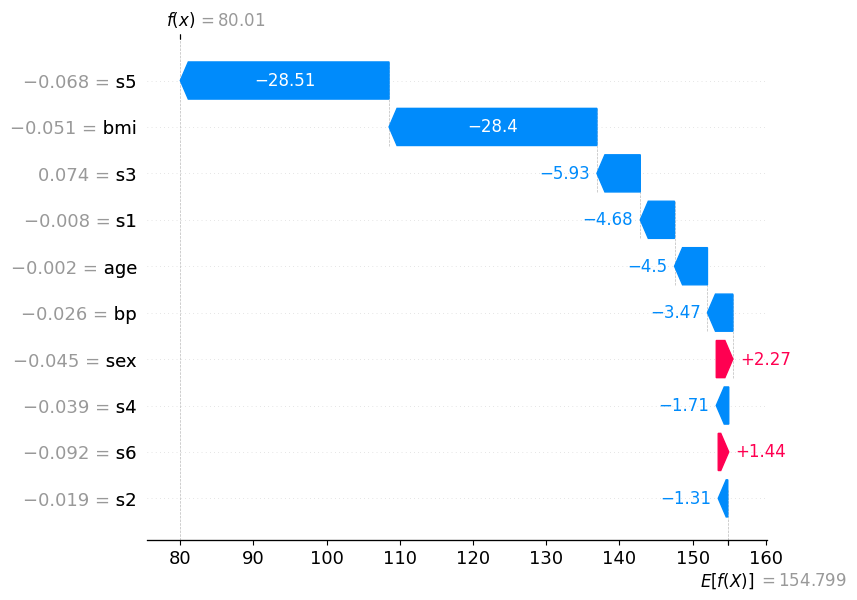

In [397]:
selected_sample = 1

shap.waterfall_plot(shap_values[selected_sample])

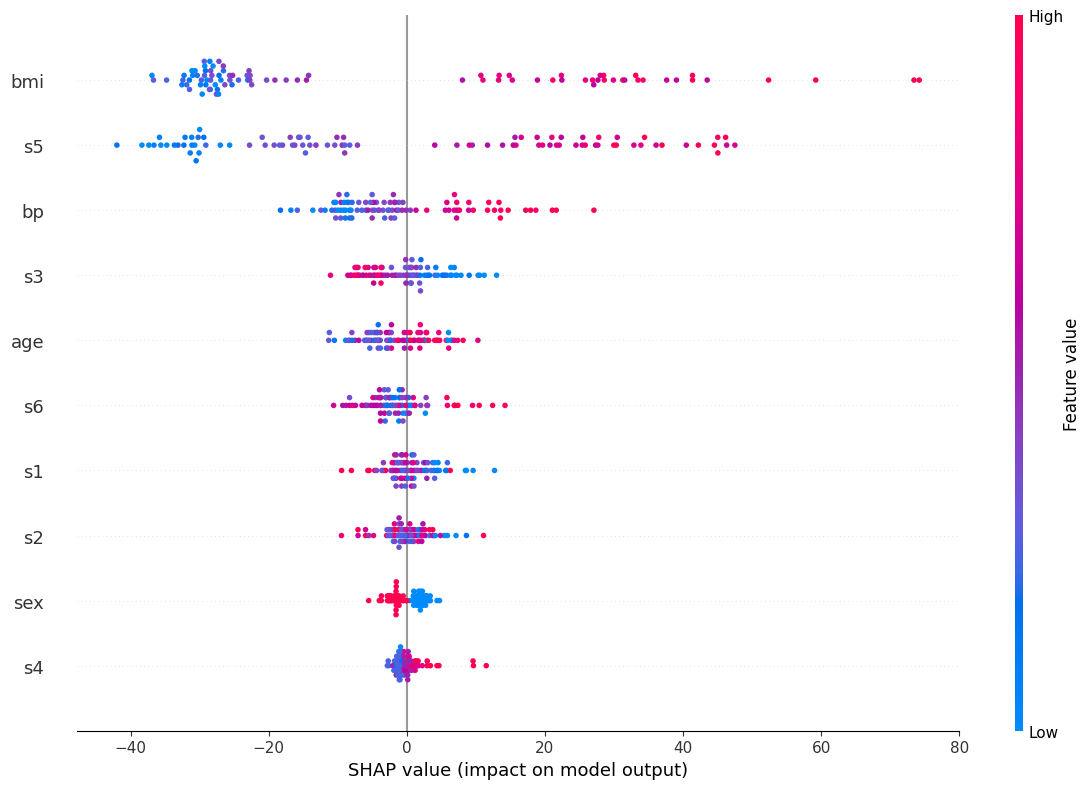

In [715]:
shap.summary_plot(shap_values, features=X_test, feature_names=inputs, plot_size=(12,8))

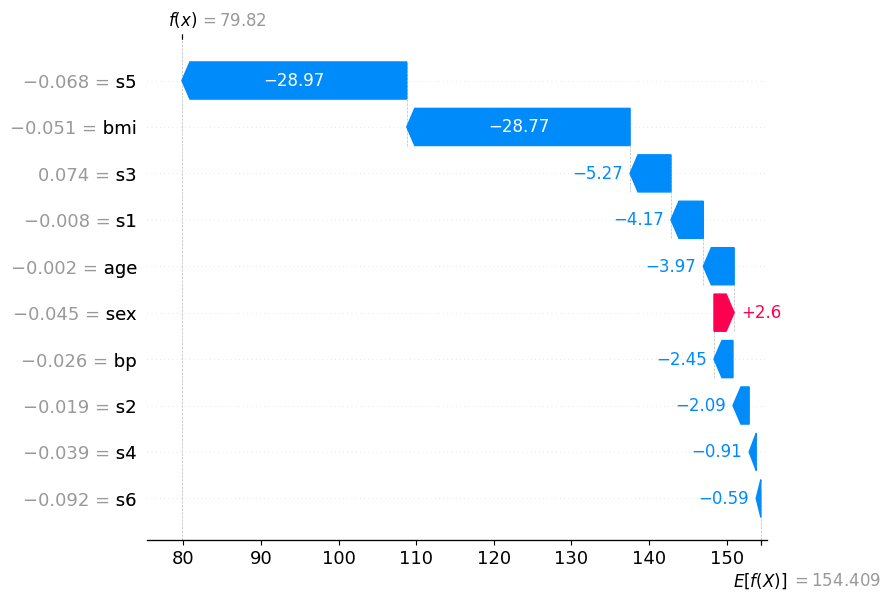

In [720]:
shap_values = explainer(dataset[inputs])
shap.waterfall_plot(shap_values[1])

# Scratch Work:

## Sklearn + MLflow

In [25]:
import mlflow
from mlflow import MlflowClient
from pprint import pprint

In [7]:
mlflow.login()

2024/07/19 10:35:34 INFO mlflow.utils.credentials: Successfully connected to MLflow hosted tracking server! Host: https://community.cloud.databricks.com.


Now you have successfully connected to MLflow tracking server on Databricks CE, and let's give our experiment a name.

In [8]:
mlflow.set_experiment("/diabetes_RF")

2024/07/19 10:35:38 INFO mlflow.tracking.fluent: Experiment with name '/diabetes_RF' does not exist. Creating a new experiment.


<Experiment: artifact_location='dbfs:/databricks/mlflow-tracking/2814375530948047', creation_time=1721399739030, experiment_id='2814375530948047', last_update_time=1721399739030, lifecycle_stage='active', name='/diabetes_RF', tags={'mlflow.experiment.sourceName': '/diabetes_RF',
 'mlflow.experimentType': 'MLFLOW_EXPERIMENT',
 'mlflow.ownerEmail': 'kylecsnow@gmail.com',
 'mlflow.ownerId': '2923586060534212'}>

In [9]:
def fetch_logged_data(run_id):
    client = MlflowClient()
    data = client.get_run(run_id).data
    tags = {k: v for k, v in data.tags.items() if not k.startswith("mlflow.")}
    artifacts = [f.path for f in client.list_artifacts(run_id, "model")]
    return data.params, data.metrics, tags, artifacts

In [10]:
# enable autologging
mlflow.sklearn.autolog()

2024/07/19 10:37:14 WARNING mlflow.utils.autologging_utils: You are using an unsupported version of sklearn. If you encounter errors during autologging, try upgrading / downgrading sklearn to a supported version, or try upgrading MLflow.


In [29]:
X = diabetes_features
y = diabetes_targets

# splitting dataset into Training (80%) and testing data (20%) using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# RF classifier with default hyperparameters
estimator = RandomForestRegressor()

with mlflow.start_run() as run:
    estimator.fit(X_train, y_train)

    y_pred = estimator.predict(X_test)
    mlflow.log_metric("test_MAE", mean_absolute_error(y_test, y_pred))
    mlflow.log_metric("test_RMSE", root_mean_squared_error(y_test, y_pred))
    mlflow.log_metric("test_R^2", r2_score(y_test, y_pred))

Uploading artifacts:   0%|          | 0/5 [00:00<?, ?it/s]

In [30]:
# classification accuracy
print(f"MAE: {mean_absolute_error(y_test, y_pred)}")
print(f"RMSE: {root_mean_squared_error(y_test, y_pred)}")
print(f"R^2: {r2_score(y_test, y_pred)}")

MAE: 44.687865168539325
RMSE: 55.2599243005984
R^2: 0.4236368872290528


In [31]:
# fetch logged data
params, metrics, tags, artifacts = fetch_logged_data(run.info.run_id)

In [34]:
pprint(params)
pprint(metrics)
pprint(tags)
pprint(artifacts)

{'bootstrap': 'True',
 'ccp_alpha': '0.0',
 'criterion': 'squared_error',
 'max_depth': 'None',
 'max_features': '1.0',
 'max_leaf_nodes': 'None',
 'max_samples': 'None',
 'min_impurity_decrease': '0.0',
 'min_samples_leaf': '1',
 'min_samples_split': '2',
 'min_weight_fraction_leaf': '0.0',
 'monotonic_cst': 'None',
 'n_estimators': '100',
 'n_jobs': 'None',
 'oob_score': 'False',
 'random_state': 'None',
 'verbose': '0',
 'warm_start': 'False'}
{'test_MAE': 44.687865168539325,
 'test_RMSE': 55.2599243005984,
 'test_R^2': 0.4236368872290528,
 'training_mean_absolute_error': 17.47056657223796,
 'training_mean_squared_error': 474.9514784702549,
 'training_r2_score': 0.9218366740533892,
 'training_root_mean_squared_error': 21.793381529038925,
 'training_score': 0.9218366740533892}
{'estimator_class': 'sklearn.ensemble._forest.RandomForestRegressor',
 'estimator_name': 'RandomForestRegressor'}
['model/MLmodel',
 'model/conda.yaml',
 'model/model.pkl',
 'model/python_env.yaml',
 'model/req

In [39]:
client = MlflowClient()
run_stuff = client.get_run(run.info.run_id)

In [52]:
print([item[0] for item in run_stuff])
run_stuff.inputs

['data', 'info', 'inputs']


<RunInputs: dataset_inputs=[<DatasetInput: dataset=<Dataset: digest='ae98ffe3', name='dataset', profile='{"num_rows": 353, "num_elements": 3530}', schema=('{"mlflow_colspec": [{"type": "double", "name": "age", "required": true}, '
 '{"type": "double", "name": "sex", "required": true}, {"type": "double", '
 '"name": "bmi", "required": true}, {"type": "double", "name": "bp", '
 '"required": true}, {"type": "double", "name": "s1", "required": true}, '
 '{"type": "double", "name": "s2", "required": true}, {"type": "double", '
 '"name": "s3", "required": true}, {"type": "double", "name": "s4", '
 '"required": true}, {"type": "double", "name": "s5", "required": true}, '
 '{"type": "double", "name": "s6", "required": true}]}'), source=('{"tags": {"mlflow.user": "kyle", "mlflow.source.name": '
 '"/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/ipykernel_launcher.py", '
 '"mlflow.source.type": "LOCAL"}}'), source_type='code'>, tags=[<InputTag: key='mlflow.data.context', value='tra

## Saving plotly plots

In [530]:
from PIL import Image

def fig2img(fig):
    """Convert a Matplotlib figure to a PIL Image and return it"""
    import io
    buf = io.BytesIO()
    fig.savefig(buf, format="svg")
    buf.seek(0)
    img = Image.open(buf)
    return img


In [531]:
dataset[inputs]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [532]:
X

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [533]:
plt.figure()

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

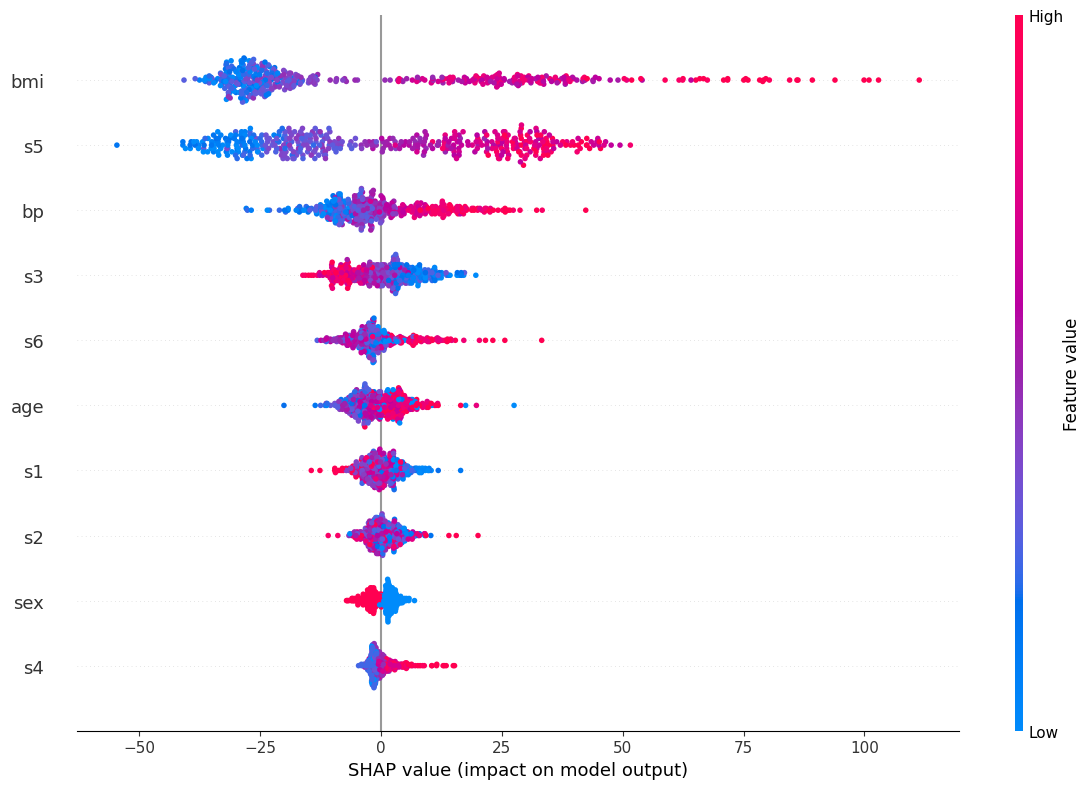

In [607]:
explainer = shap.Explainer(estimator, output_names=outputs)
shap_values = explainer(dataset[inputs])
# shap.summary_plot(shap_values, features=dataset[inputs], feature_names=inputs, plot_size=(12,8), show=True)
fig = shap.summary_plot(shap_values, features=dataset[inputs], feature_names=inputs, plot_size=(12,8), show=False)
fig = plt.gcf()

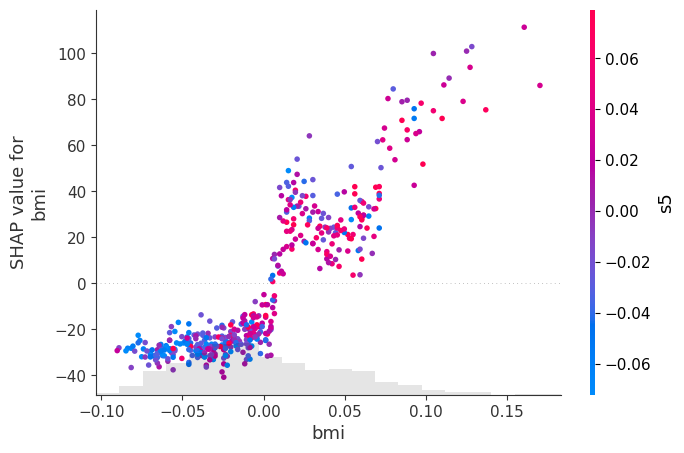

In [608]:
shap.plots.scatter(shap_values[:, "bmi"], color=shap_values)

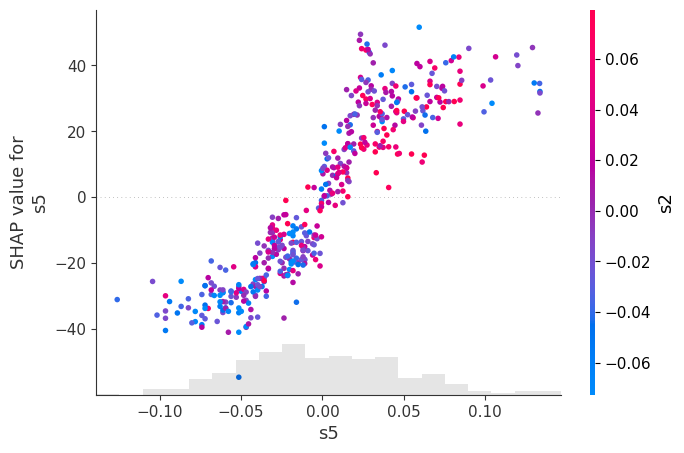

In [610]:
shap.plots.scatter(shap_values[:, "s5"], color=shap_values)

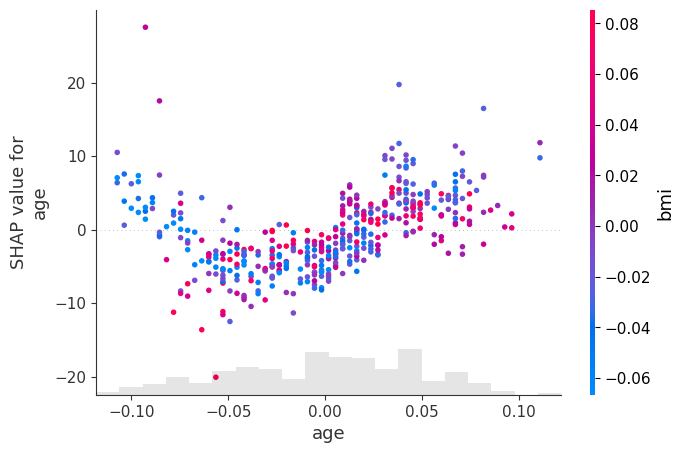

In [609]:
shap.plots.scatter(shap_values[:, "age"], color=shap_values)

In [ ]:
fig, axs = plt.subplots(nrows=4, ncols=4)

for i, feature in enumerate(inputs):
    

In [614]:
selected_variables = [inputs[0], inputs[2]]
selected_variables

['age', 'bmi']

In [636]:
if len(selected_variables) == 2:
    fig = px.scatter(
        dataset,
        x=selected_variables[0],
        y=selected_variables[1],
        marginal_x="histogram",
        marginal_y="histogram",
        # height=1000,
        # width=1000,
    )

elif len(selected_variables) >= 3:
    fig = px.scatter_3d(
        dataset,
        x=selected_variables[0],
        y=selected_variables[1],
        z=selected_variables[2],
    )

else:
    fig = pd.DataFrame([])

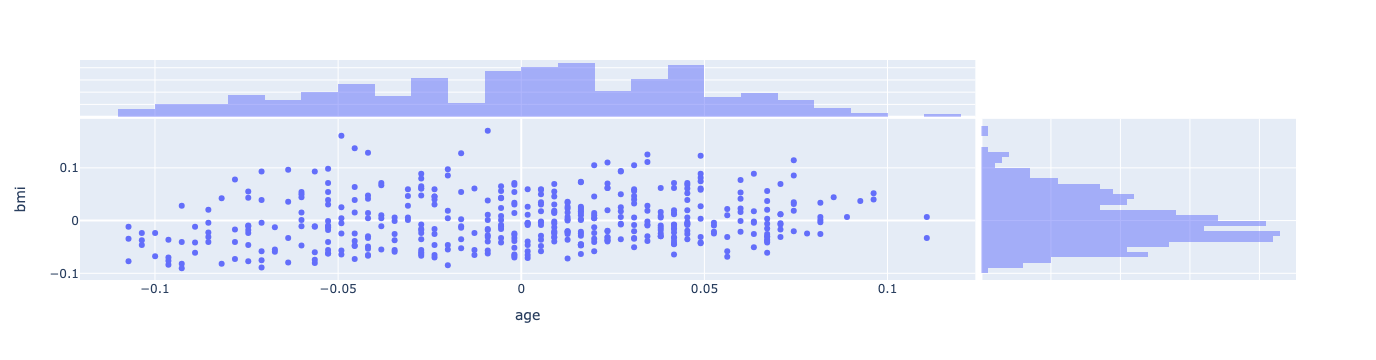

In [637]:
fig

In [ ]:
fig = px.imshow(fig)

In [535]:
fig = px.imshow(fig2img(fig))

print(type(fig))

fig.update_layout(
    showlegend=False,
    xaxis=dict(visible=False),
    yaxis=dict(visible=False),
    hovermode=False,
)
fig

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x332da5850>

In [520]:
type(fig)

plotly.graph_objs._figure.Figure

In [490]:
shap.summary_plot(shap_values[1], features=X_test, feature_names=inputs, plot_size=(12,8), show=False)
fig = plt.gcf()
type(fig)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

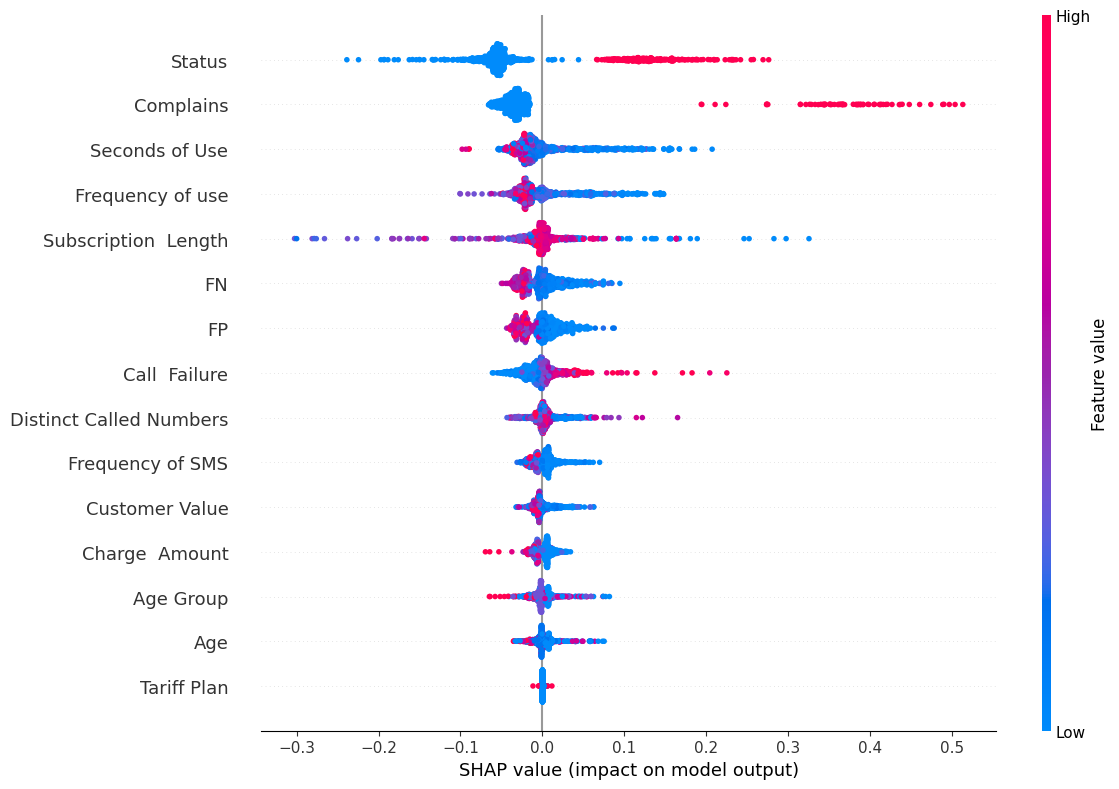

In [278]:
plt = shap.summary_plot(shap_values[1], features=X_test, feature_names=inputs, plot_size=(12,8))

## Violin plots with plotly

In [228]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

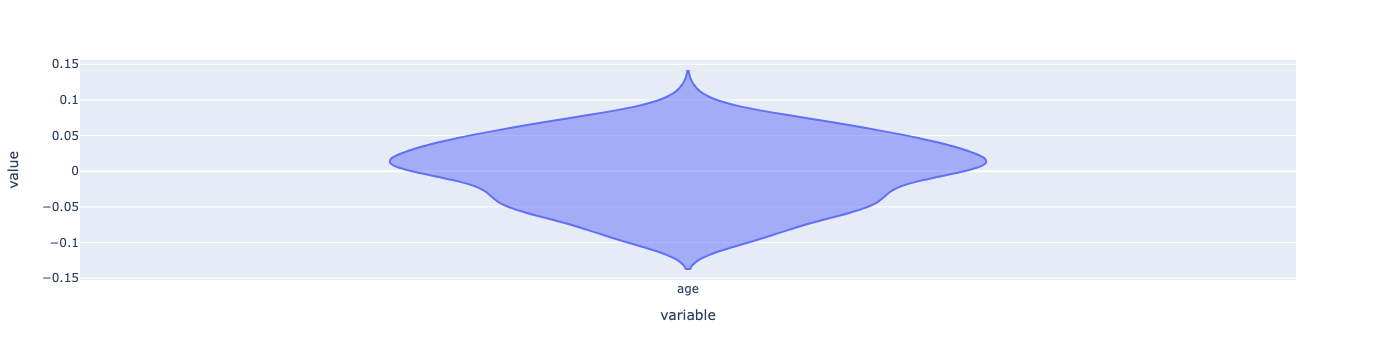

In [222]:
px.violin(diabetes_dataset["age"])

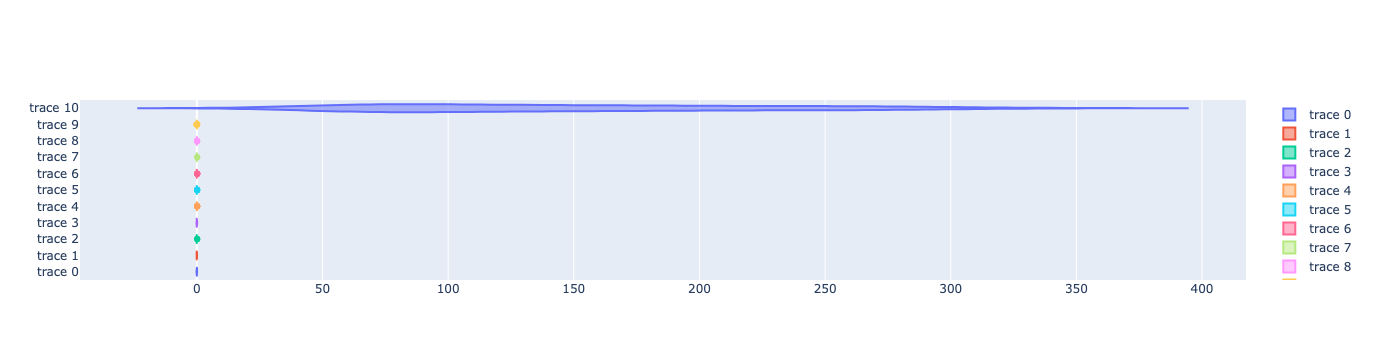

In [225]:
fig = go.Figure()


for item in inputs + outputs:
    # print(item)
    # print(dataset[item])

    fig.add_trace(go.Violin(
        x=dataset[item],
        # y=dataset[item],
        # box_visible=True,
        # line_color='black',
        # meanline_visible=True,
        # fillcolor='lightseagreen',
        # opacity=0.6,
        # x0=item
    ))

fig.show()


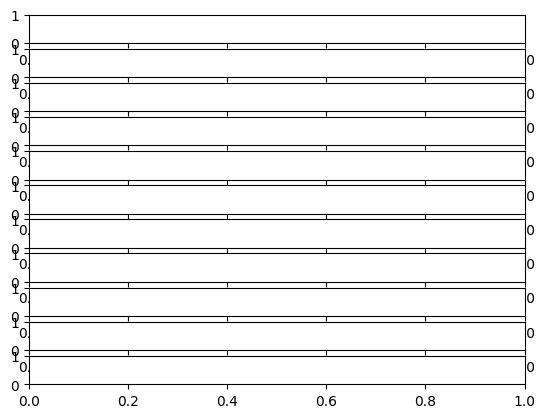

In [227]:
fig, axs = plt.subplots(nrows=len(inputs+outputs))

for i, item in enumerate(inputs+outputs):
    axs[i] = 

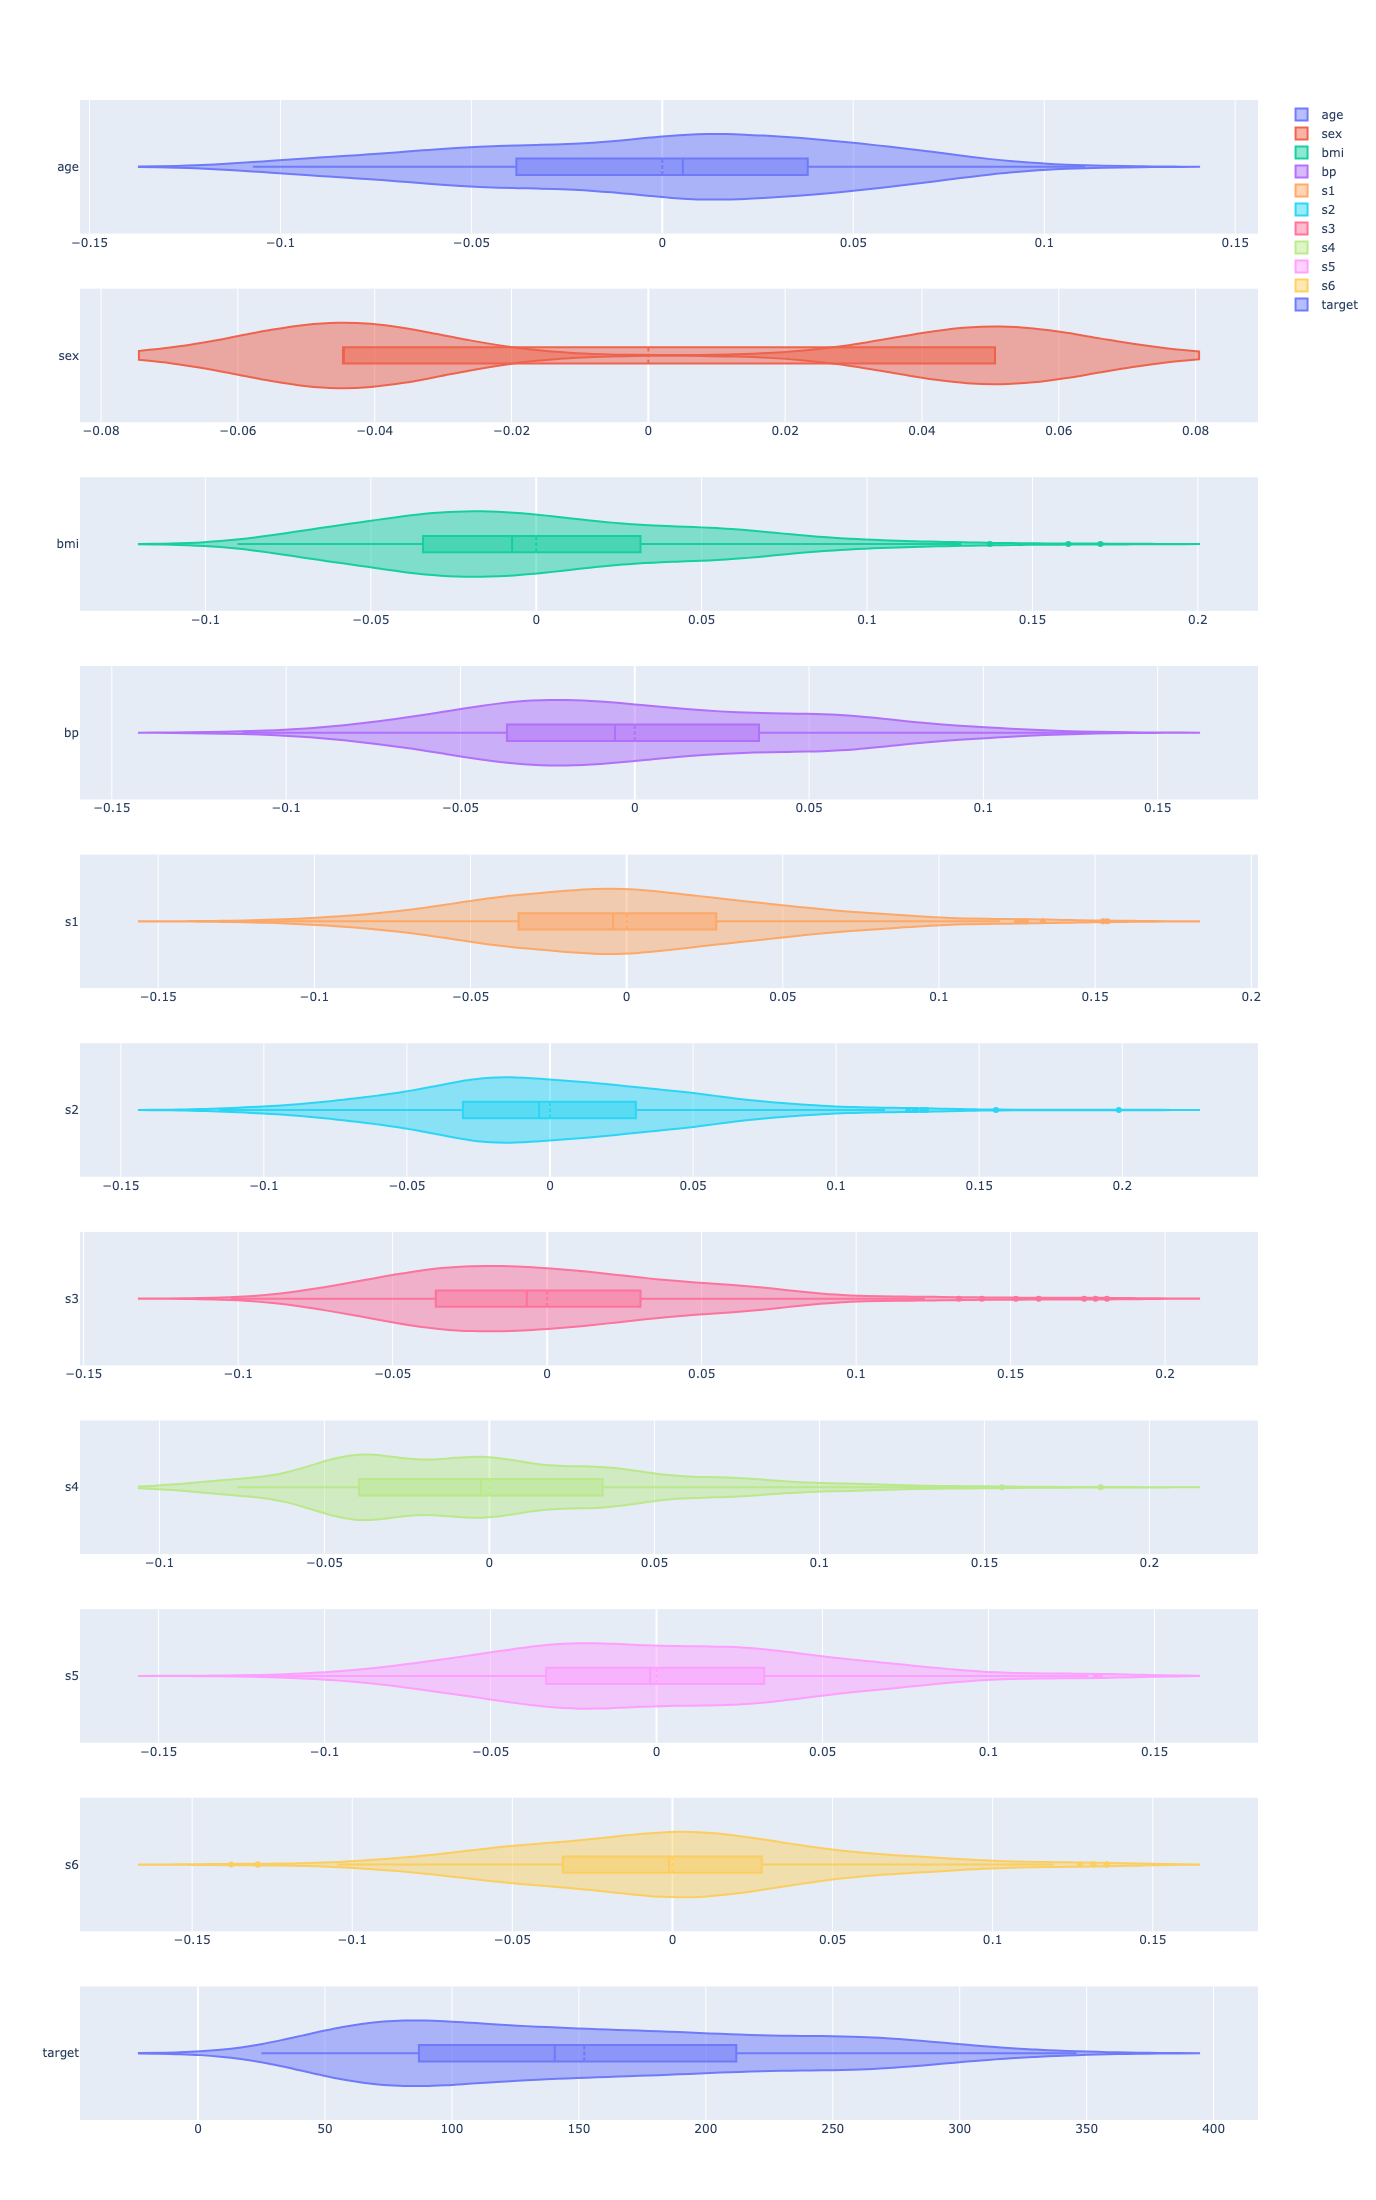

In [254]:
fig = make_subplots(rows=len(inputs+outputs))

for i, item in enumerate(inputs + outputs):
    fig.add_trace(
        go.Violin(
            x=dataset[item],
            box_visible=True,
            meanline_visible=True,
            opacity=0.9,
            y0=item,
            name=item,
        ),
        row=i+1, col=1
    )

fig.update_layout(height=200*len(inputs+outputs))
fig.update_layout()
fig.show()

In [252]:
px.imshow(fig)

TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

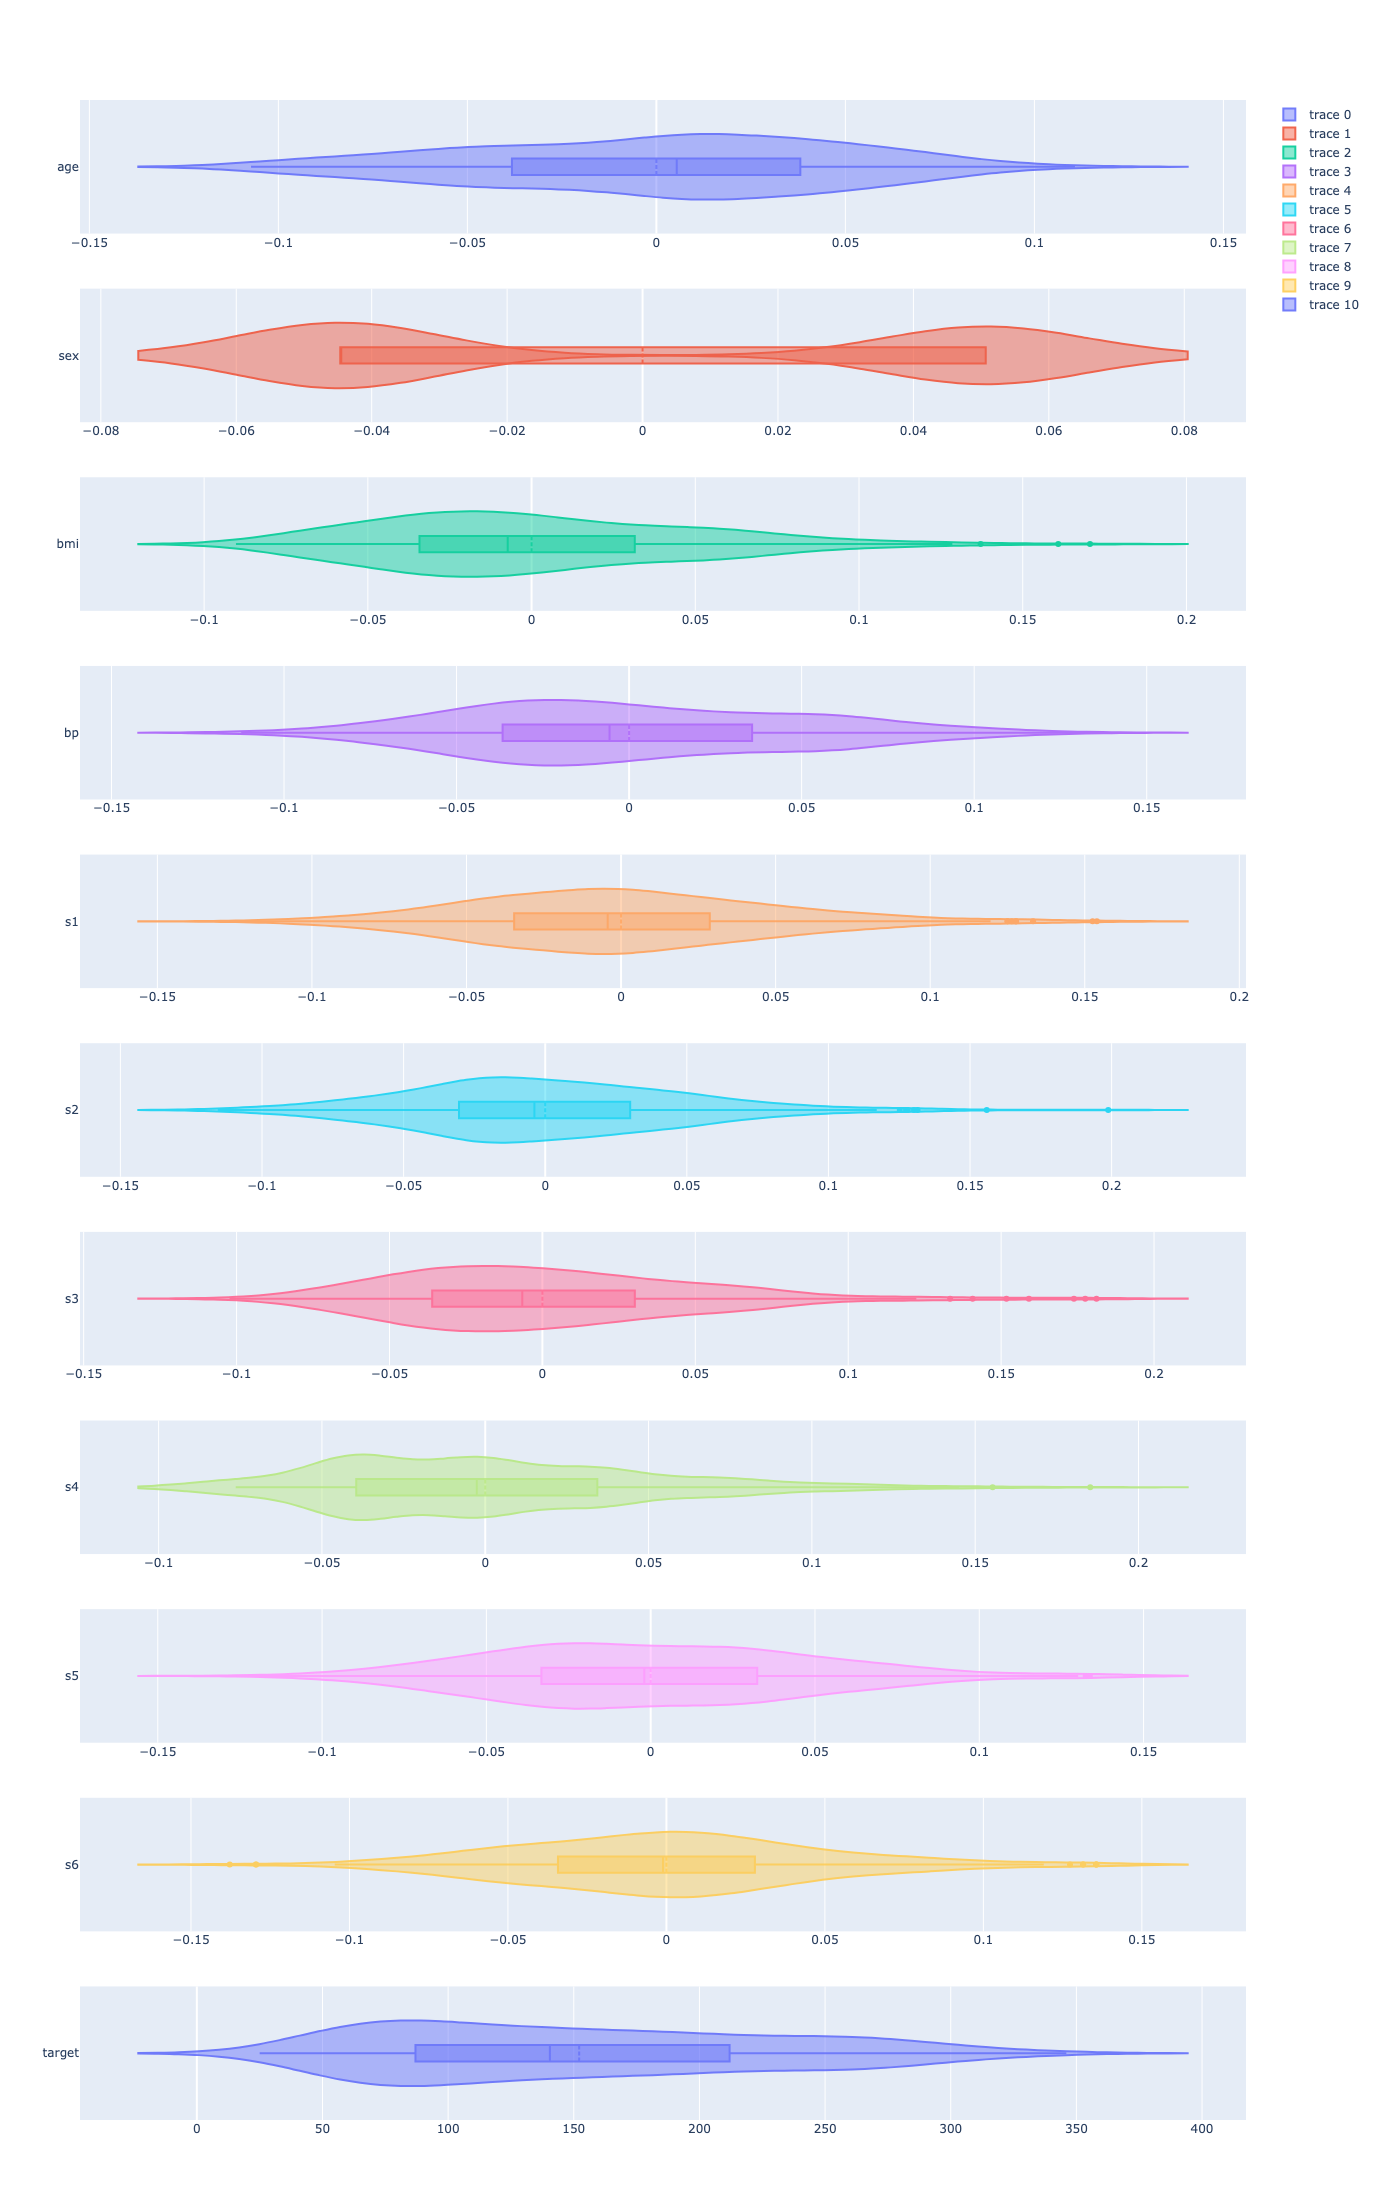

In [253]:
fig

In [ ]:
# Create an XGB classifier and instance of the same
from xgboost import XGBClassifier
clf = XGBClassifier()
clf

# ---NEW WAY---

## Iris Dataset

In [29]:
iris = datasets.load_iris()

In [30]:
inputs = iris.feature_names
outputs = ["Iris Class"]

In [31]:
iris_features = pd.DataFrame(data=iris.data, columns=iris.feature_names)

### CHECK:
iris_features.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [32]:
iris_targets = pd.DataFrame(data=iris.target, columns=outputs)

### CHECK:
iris_targets.columns

Index(['Iris Class'], dtype='object')

In [33]:
iris_dataset = pd.concat(objs=[iris_features, iris_targets], axis=1)

### CHECK:
iris_dataset

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Iris Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [34]:
X = iris_features
Y = iris_targets

if isinstance(Y, pd.Series):
    Y = pd.DataFrame(Y)

### Train a Model

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

target = "Iris Class"
iris_rf_results = train_and_evaluate_estimator(
    estimator=RandomForestClassifier(),
    train_df=train_df,
    test_df=test_df,
    inputs=inputs,
    target=target,
)

### CHECK:
iris_rf_results

Train R^2:  1.0
Train MAE:  0.0
Train RMSE:  0.0

Test R^2:  1.0
Test MAE:  0.0
Test RMSE:  0.0


{'target': 'Iris Class',
 'estimator': RandomForestClassifier(),
 'inputs': ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 'metrics': {'train': {'R^2': 1.0, 'MAE': 0.0, 'RMSE': 0.0},
  'test': {'R^2': 1.0,
   'MAE': 0.0,
   'RMSE': 0.0,
   'Coverage Fraction': None,
   'k': 1.0000000000000004,
   'R^2_0': 1.0}},
 'y_train': array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
        1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
        1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1, 2, 2, 1,
        0, 0, 2, 2, 0, 0, 0, 1, 2, 0, 2, 2, 0, 1, 1, 2, 1, 2, 0, 2, 1, 2,
        1, 1, 1, 0, 1, 1, 0, 1, 2, 2, 0, 1, 2, 2, 0, 2, 0, 1, 2, 2, 1, 2,
        1, 1, 2, 2, 0, 1, 2, 0, 1, 2]),
 'y_pred_train': array([0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0, 0, 1, 2, 2, 1, 2, 1, 2,
        1, 0, 2, 1, 0, 0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 2, 0, 1, 2, 0, 2, 2,
        1, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 2, 0, 0, 1, 1

In [43]:
print("Classifier?", isinstance(iris_rf_results["estimator"], ClassifierMixin))
print("Regressor?", isinstance(iris_rf_results["estimator"], RegressorMixin))

Classifier? True
Regressor? False


### Save & Load Artifacts

In [ ]:
filename = "iris_dataset.pkl"
dataset_to_save = iris_dataset

In [ ]:
filepath = os.path.join(os.getcwd(), "../", "datasets", filename)
with open(filepath, "wb") as handle:
    pickle.dump(dataset_to_save, handle)

Load Dataset

In [ ]:
with open(filepath, "rb") as f:
    dataset = pickle.load(f)

### CHECK:
dataset

Save model

In [ ]:
filename = "iris_RF.pkl"
model_to_save = estimator

In [ ]:
estimator.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
estimator_type = str(type(estimator)).split("<class '")[-1].split("'>")[0]
estimator_type = f"{estimator_type.split('.')[0]} {estimator_type.split('.')[-1]}"
estimator_type

'sklearn RandomForestClassifier'

In [ ]:
model_and_metadata = {
    "training_data": "linnerud_dataset",
    "estimators_by_output": {
        output: {
            "estimator": estimators_by_output[output], 
            "model_type": estimator_type,
            "inputs_reals": inputs,
        } for output in estimators_by_output.keys()
    }
}

In [ ]:
model_and_metadata

{'training_data': 'linnerud_dataset',
 'estimators_by_output': {'Iris Class': {'estimator': RandomForestClassifier(),
   'model_type': 'sklearn RandomForestClassifier',
   'inputs_reals': ['sepal length (cm)',
    'sepal width (cm)',
    'petal length (cm)',
    'petal width (cm)']}}}

In [ ]:
filepath = os.path.join(os.getcwd(), "../", "pickle", "models", filename)
with open(filepath, "wb") as handle:
    pickle.dump(model_and_metadata, handle)

### Load model

In [ ]:
filepath = '/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/models/iris_RF.pkl'

In [ ]:
filepath

'/Users/kyle/dev/dash-ml-dashboard/notebooks/../pickle/models/iris_RF.pkl'

In [ ]:
with open(filepath, "rb") as f:
    model_and_metadata = pickle.load(f)

In [ ]:
estimators_by_output = model_and_metadata["estimators_by_output"]
estimators_by_output

{'Iris Class': {'estimator': RandomForestClassifier(),
  'model_type': 'sklearn RandomForestClassifier',
  'inputs_reals': ['sepal length (cm)',
   'sepal width (cm)',
   'petal length (cm)',
   'petal width (cm)']}}

In [ ]:
estimator = estimators_by_output["Iris Class"]["estimator"]
estimator

RandomForestClassifier()

In [ ]:
estimators_by_output["Iris Class"]["model_type"]

'sklearn RandomForestClassifier'

In [ ]:
inputs = estimators_by_output["Iris Class"]["inputs_reals"]
inputs

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
outputs = list(model_and_metadata["estimators_by_output"].keys())
outputs

['Iris Class']

In [ ]:
estimator.feature_importances_

array([0.08995242, 0.02695579, 0.45537527, 0.42771653])

## Diabetes Dataset

In [37]:
diabetes_features, diabetes_targets = datasets.load_diabetes(return_X_y=True, as_frame=True)
diabetes_dataset = pd.concat(objs=[diabetes_features, diabetes_targets], axis=1)

### CHECK:
diabetes_dataset

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [38]:
X = diabetes_features
Y = diabetes_targets

if isinstance(Y, pd.Series):
    Y = pd.DataFrame(Y)

In [39]:
inputs = diabetes_features.columns.tolist()
outputs = [diabetes_targets.name]

### CHECK:
print(outputs)
inputs

['target']


['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [40]:
Y

,target
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


### Train a Model

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

target = "target"
diabetes_rf_results = train_and_evaluate_estimator(
    estimator=RandomForestRegressor(),
    train_df=train_df,
    test_df=test_df,
    inputs=inputs,
    target=target,
)

### CHECK:
diabetes_rf_results

Train R^2:  0.9218092249323233
Train MAE:  17.801643059490083
Train RMSE:  21.7972078545615

Test R^2:  0.45603834739052374
Test MAE:  42.784606741573036
Test RMSE:  53.6841818499535


{'target': 'target',
 'estimator': RandomForestRegressor(),
 'inputs': ['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'],
 'metrics': {'train': {'R^2': 0.9218092249323233,
   'MAE': 17.801643059490083,
   'RMSE': 21.7972078545615},
  'test': {'R^2': 0.45603834739052374,
   'MAE': 42.784606741573036,
   'RMSE': 53.6841818499535,
   'Coverage Fraction': None,
   'k': 0.898464574593791,
   'R^2_0': -0.0029008203647880038}},
 'y_train': array([144., 150., 280., 125.,  59.,  65., 281., 277., 167.,  90.,  72.,
        178.,  88., 270., 101., 197.,  97.,  53.,  71., 262.,  52., 102.,
        166., 189., 173., 220., 206.,  97.,  60.,  61., 242., 121., 128.,
        104., 265., 132., 283., 174., 129., 257., 137.,  63.,  93., 232.,
        208., 261., 179., 258., 262.,  51., 237.,  71., 139., 268.,  69.,
        317., 249., 154., 192., 116.,  81., 122., 259., 191., 292.,  55.,
        107., 210.,  91., 253.,  85., 252.,  59.,  78., 200.,  78., 245.,
        175.,  42., 127.,  53., 

In [44]:
print("Classifier?", isinstance(diabetes_rf_results["estimator"], ClassifierMixin))
print("Regressor?", isinstance(diabetes_rf_results["estimator"], RegressorMixin))

Classifier? False
Regressor? True


In [45]:
create_parity_plot(diabetes_rf_results)

In [46]:
create_residual_plot(diabetes_rf_results)

In [48]:
results = diabetes_rf_results
estimator = results["estimator"]
estimator_inputs = results["inputs"]
X_lc = train_df[estimator_inputs]
y_lc = train_df[target]

learning_curve_data = generate_learning_curve_data(estimator, X_lc, y_lc, n_jobs=4, scoring="r2", verbose=True)

[learning_curve] Training set sizes: [ 28  56  84 112 141 169 197 225 253 282]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  50 out of  50 | elapsed:    2.3s finished


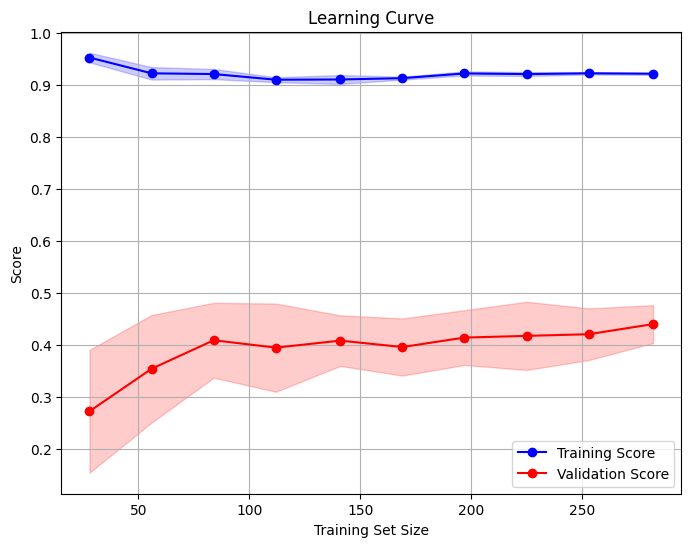

In [49]:
create_learning_curve_plot(learning_curve_data)

### Save & Load Artifacts

## Linnerud Dataset

In [2]:
# Load the Linnerud dataset
linnerud_features, linnerud_targets = datasets.load_linnerud(return_X_y=True, as_frame=True)
linnerud_dataset = pd.concat(objs=[linnerud_features, linnerud_targets], axis=1)

### CHECK:
linnerud_dataset

,Chins,Situps,Jumps,Weight,Waist,Pulse
0,5.0,162.0,60.0,191.0,36.0,50.0
1,2.0,110.0,60.0,189.0,37.0,52.0
2,12.0,101.0,101.0,193.0,38.0,58.0
3,12.0,105.0,37.0,162.0,35.0,62.0
4,13.0,155.0,58.0,189.0,35.0,46.0
5,4.0,101.0,42.0,182.0,36.0,56.0
6,8.0,101.0,38.0,211.0,38.0,56.0
7,6.0,125.0,40.0,167.0,34.0,60.0
8,15.0,200.0,40.0,176.0,31.0,74.0
9,17.0,251.0,250.0,154.0,33.0,56.0


In [3]:
X = linnerud_features
Y = linnerud_targets

if isinstance(Y, pd.Series):
    Y = pd.DataFrame(Y)

In [4]:
inputs = linnerud_features.columns.tolist()
outputs = linnerud_targets.columns.tolist()

### CHECK:
print(outputs)
inputs

['Weight', 'Waist', 'Pulse']


['Chins', 'Situps', 'Jumps']

### Train a Model

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
train_df = pd.concat([X_train, y_train], axis=1)
test_df = pd.concat([X_test, y_test], axis=1)

linnerud_results = {}
for target in outputs:
    target_results = train_and_evaluate_estimator(
        estimator=RandomForestRegressor(),
        train_df=train_df,
        test_df=test_df,
        inputs=inputs,
        target=target,
        verbose=False,
    )
    linnerud_results[target] = target_results

### CHECK:
linnerud_results

{'Weight': {'target': 'Weight',
  'estimator': RandomForestRegressor(),
  'inputs': ['Chins', 'Situps', 'Jumps'],
  'metrics': {'train': {'R^2': 0.8093718069663975,
    'MAE': 7.262499999999999,
    'RMSE': 11.061049339913458},
   'test': {'R^2': -1.3843855078906415,
    'MAE': 22.349999999999994,
    'RMSE': 25.893230775629366,
    'Coverage Fraction': None,
    'k': 0.8849170752969379,
    'R^2_0': -4.763340002889395}},
  'y_train': array([176., 182., 166., 162., 156., 176., 247., 193., 154., 138., 189.,
         154., 167., 169., 193., 211.]),
  'y_pred_train': array([173.54, 184.87, 163.91, 176.45, 160.75, 188.03, 215.22, 193.22,
         155.61, 156.6 , 179.81, 158.48, 167.1 , 169.59, 191.93, 201.09]),
  'y_pred_train_uncertainty': None,
  'y_test': array([191., 157., 202., 189.]),
  'y_pred_test': array([174.96, 161.6 , 163.18, 159.06]),
  'y_pred_test_uncertainty': None},
 'Waist': {'target': 'Waist',
  'estimator': RandomForestRegressor(),
  'inputs': ['Chins', 'Situps', 'Jumps

In [11]:
linnerud_results["Pulse"]['metrics']

{'train': {'R^2': 0.7984633437767016,
  'MAE': 2.768750000000001,
  'RMSE': 3.3250827057383114},
 'test': {'R^2': -0.27423636363636494,
  'MAE': 5.200000000000003,
  'RMSE': 5.294638797878475,
  'Coverage Fraction': None,
  'k': 1.0329543907420013,
  'R^2_0': -9.539457760960275}}

In [12]:
linnerud_results["Waist"]['metrics']

{'train': {'R^2': 0.8606098452883262,
  'MAE': 0.8074999999999997,
  'RMSE': 1.2444024670499494},
 'test': {'R^2': -0.5048235294117664,
  'MAE': 2.3850000000000016,
  'RMSE': 2.528932581149606,
  'Coverage Fraction': None,
  'k': 0.9505298536971136,
  'R^2_0': -9.949150005880881}}

In [13]:
linnerud_results["Weight"]['metrics']

{'train': {'R^2': 0.8093718069663975,
  'MAE': 7.262499999999999,
  'RMSE': 11.061049339913458},
 'test': {'R^2': -1.3843855078906415,
  'MAE': 22.349999999999994,
  'RMSE': 25.893230775629366,
  'Coverage Fraction': None,
  'k': 0.8849170752969379,
  'R^2_0': -4.763340002889395}}

In [40]:
target = "Pulse"
create_parity_plot(linnerud_results[target], title=f"Parity Plot - {target}")

In [41]:
create_residual_plot(linnerud_results[target], title=f"Standardized Residual Plot - {target}")

In [42]:
results = linnerud_results[target]
estimator = results["estimator"]
estimator_inputs = results["inputs"]
X_lc = train_df[estimator_inputs]
y_lc = train_df[target]

learning_curve_data = generate_learning_curve_data(estimator, X_lc, y_lc, n_jobs=4, scoring="r2", verbose=True)

[learning_curve] Training set sizes: [ 1  2  3  4  6  7  8  9 10 12]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/m

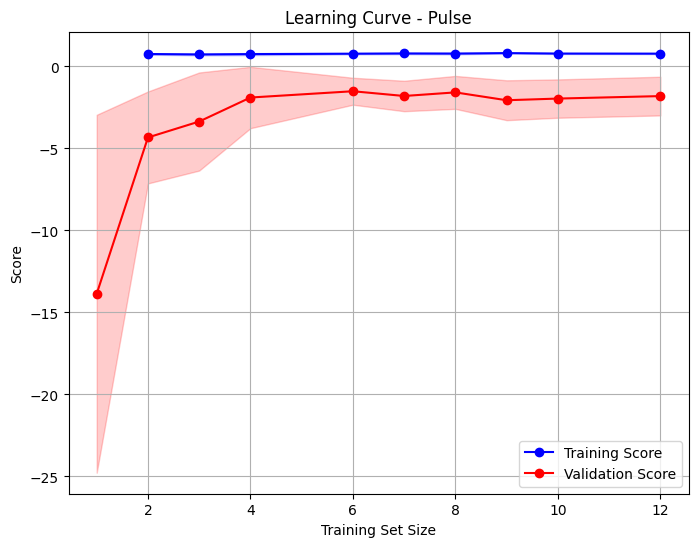

In [43]:
create_learning_curve_plot(learning_curve_data, title=f"Learning Curve - {target}")

In [48]:
target = "Waist"
create_parity_plot(linnerud_results[target], title=f"Parity Plot - {target}")

In [49]:
create_residual_plot(linnerud_results[target], title=f"Standardized Residual Plot - {target}")

In [50]:
results = linnerud_results[target]
estimator = results["estimator"]
estimator_inputs = results["inputs"]
X_lc = train_df[estimator_inputs]
y_lc = train_df[target]

learning_curve_data = generate_learning_curve_data(estimator, X_lc, y_lc, n_jobs=4, scoring="r2", verbose=True)

[learning_curve] Training set sizes: [ 1  2  3  4  6  7  8  9 10 12]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/m

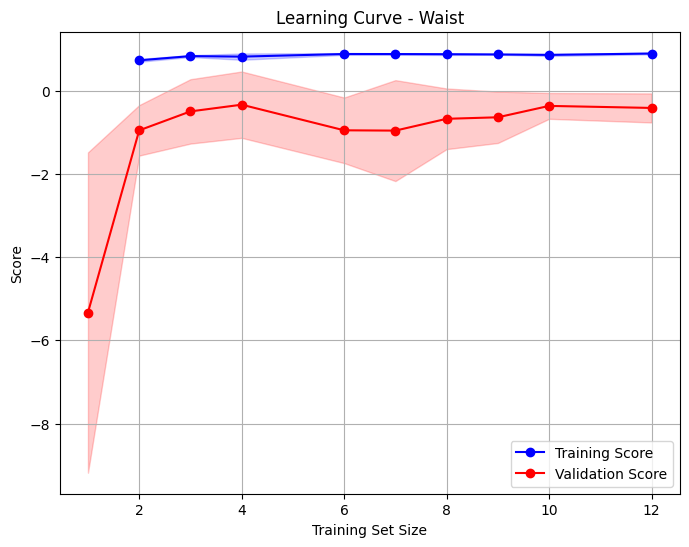

In [51]:
create_learning_curve_plot(learning_curve_data, title=f"Learning Curve - {target}")

In [52]:
target = "Weight"
create_parity_plot(linnerud_results[target], title=f"Parity Plot - {target}")

In [53]:
create_residual_plot(linnerud_results[target], title=f"Standardized Residual Plot - {target}")

In [54]:
results = linnerud_results[target]
estimator = results["estimator"]
estimator_inputs = results["inputs"]
X_lc = train_df[estimator_inputs]
y_lc = train_df[target]

learning_curve_data = generate_learning_curve_data(estimator, X_lc, y_lc, n_jobs=4, scoring="r2", verbose=True)

[learning_curve] Training set sizes: [ 1  2  3  4  6  7  8  9 10 12]


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/ml-dashboard/lib/python3.11/site-packages/sklearn/metrics/_regression.py:1266: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
/opt/anaconda3/envs/m

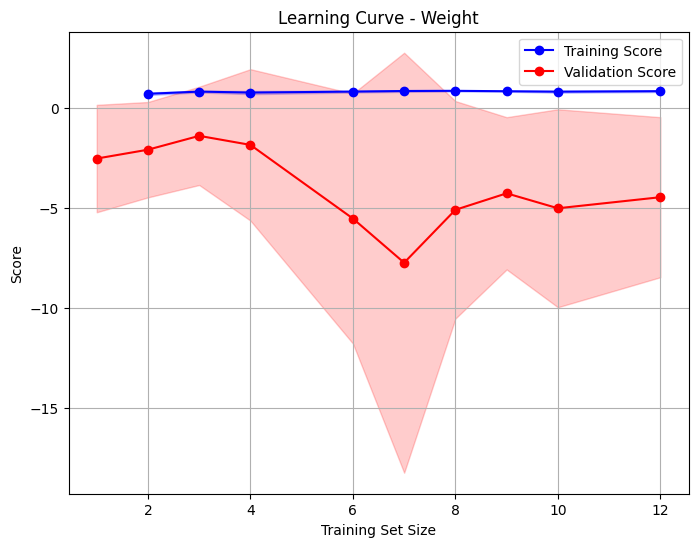

In [55]:
create_learning_curve_plot(learning_curve_data, title=f"Learning Curve - {target}")